# Term Project Milestone 1 (Week 6)

Name: Kesav Adithya Venkidusamy <br>
Course: DSC550 - Data Mining <br>
Instructor: Brett Werner <br>
Assignment: Week 6

## Austin House Price Model Building Project

##### Begin Milestone 1 with a 250-500-word narrative describing your original idea for the analysis/model building business problem. Clearly identify the problem you will address and the target for your model

<b>Idea</b>: During covid-19 pandemic, the housing market has been increased exponentially across USA. Texas is one of the state which saw the house prices to skyrocket. Among various cities in Texas, I have chosen the house sale data available in and aroud Austin for this analysis. There are numerous factors contribute to increase in home price. We will explore what factors (such as location, square feet, school ratings) of the house affects the sale price. We will build and evaluate a regression model to predict features affecting the house prices in Austin, Texas location based on the available data.

<b>Dataset</b>: In this project, we will work with a dataset on the Austin housing data. The data is downloaded from the Kaggle link: https://www.kaggle.com/datasets/ericpierce/austinhousingprices. 

The dataset contains 47 columns and ~15000 rows. The dataset contains house sale price for 3 years (2018-2021) in and around Austin, Texas area. Basically, this is dataset extracted from Zillow website which tells the features of the house and sold price. "latestPrice" is the price 

### Data Exploration

##### Step 1: Importing libraries for data processing

In [122]:
## Importing the libraries required for data processing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import yellowbrick
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

##### Step 2: Source Dataframe creation

In [123]:
## Import the csv file having Austin housing data into dataframe
house_df = pd.read_csv('austinHousingData.csv') 

In [124]:
## Display few records in dataframe using head command
house_df.head()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,True,True,True,False,False,Single Family,2,2012,305000.0,5,2019-09-02,9,2019,"Coldwell Banker United, Realtors - South Austin",39,0,5,2,1,3,0,1,0,6011.0,2601.0,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,True,True,True,False,False,Single Family,2,2013,295000.0,1,2020-10-13,10,2020,Agent Provided,29,0,1,2,0,0,0,0,0,6185.0,1768.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,True,False,True,False,False,Single Family,0,2018,256125.0,1,2019-07-31,7,2019,Agent Provided,2,0,4,1,0,1,0,0,0,7840.0,1478.0,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,True,True,True,False,False,Single Family,2,2013,240000.0,4,2018-08-08,8,2018,Agent Provided,9,0,0,2,0,0,0,0,0,6098.0,1678.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,True,False,True,False,False,Single Family,0,2002,239900.0,3,2018-10-31,10,2018,Agent Provided,27,0,0,1,0,0,0,0,0,6708.0,2132.0,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [125]:
## Calculating total number of rows and columns using shape command
print("Total number of rows and columns: {}".format(house_df.shape))

Total number of rows and columns: (15171, 47)


In [126]:
## Dislaying the datatypes for each of the column present in dataframe
house_df.dtypes

zpid                            int64
city                           object
streetAddress                  object
zipcode                         int64
description                    object
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
latest_saledate                object
latest_salemonth                int64
latest_saleyear                 int64
latestPriceSource              object
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfApplian

In [127]:
## Looking at summary information about your data (total, mean, min, max, freq, unique, etc.)
house_df.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_salemonth,latest_saleyear,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,30.291596,-97.778532,1.994085,1.229187,1.224507,1988.554743,5.127677e+05,3.032892,6.733043,2019.078241,30.640432,0.012985,3.474722,1.710105,0.663371,0.466878,0.002768,0.208490,0.018852,1.190840e+05,2208.323314,0.940676,0.049173,1.035990,0.976798,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273
std,3.179426e+08,18.893475,0.096973,0.084715,0.053102,1.352117,1.352732,21.579458,4.531853e+05,2.487392,3.146760,0.813941,21.175174,0.179438,1.893351,0.788641,0.983779,0.824481,0.061771,0.488331,0.206775,1.225272e+07,1378.576119,0.236516,0.234937,0.263633,0.292043,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697
min,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,1.000000,2018.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+02,300.000000,0.000000,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.941115e+07,78727.000000,30.203313,-97.838009,1.980000,0.000000,0.000000,1974.000000,3.090000e+05,1.000000,4.000000,2018.000000,20.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.534000e+03,1483.000000,1.000000,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,2.949441e+07,78739.000000,30.284416,-97.769539,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,7.000000,2019.000000,29.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.276000e+03,1975.000000,1.000000,0.000000,1.000000,1.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,7.033762e+07,78749.000000,30.366585,-97.717903,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,9.000000,2020.000000,39.000000,0.000000,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.089000e+04,2687.000000,1.000000,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,12.000000,2021.000000,179.000000,8.000000,12.000000,6.000000,8.000000,6.000000,2.000000,4.000000,8.000000,1.508483e+09,109292.000000,2.000000,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


In [128]:
## Summarized Data
house_df.describe(include=['O'])

,city,streetAddress,description,homeType,latest_saledate,latestPriceSource,homeImage
count,15171,15171,15171,15171,15171,15171,15171
unique,9,15164,15133,10,958,225,15171
top,austin,10816 Mickelson Dr,Coming soon! Photos and details will be availa...,Single Family,2019-06-28,Agent Provided,70327819_streetviewlocation7000CoveredBridgeDr...
freq,15020,2,12,14241,68,10486,1


In [129]:
## Printing the info of the dataframe
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15171 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [130]:
## find out missing values in the dataset for all the variables
house_df.isnull().sum()

zpid                          0
city                          0
streetAddress                 0
zipcode                       0
description                   0
latitude                      0
longitude                     0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
latestPrice                   0
numPriceChanges               0
latest_saledate               0
latest_salemonth              0
latest_saleyear               0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numOfWaterfrontFeatures       0
numOfWin

#### Observation

1. Dataset contains 15171 rows and 47 columns
2. Some of the columns present in the data may not be useful for model
3. There are outliers present across most of the columns; Require EDA
4. Data doesn't have any null values

### Visualizations

##### 1. Histogram

A histogram is a graphical representation that organizes a group of data points into user-specified ranges. As a first step, we we will create histogram for the following variables present in the dataset

1. latestprice - Latest price of the house
2. livingAreaSqFt - Living area in sq.ft
3. lotSizeSqFt - Total lot size in sq.ft
4. avgSchoolRating - Average school rating

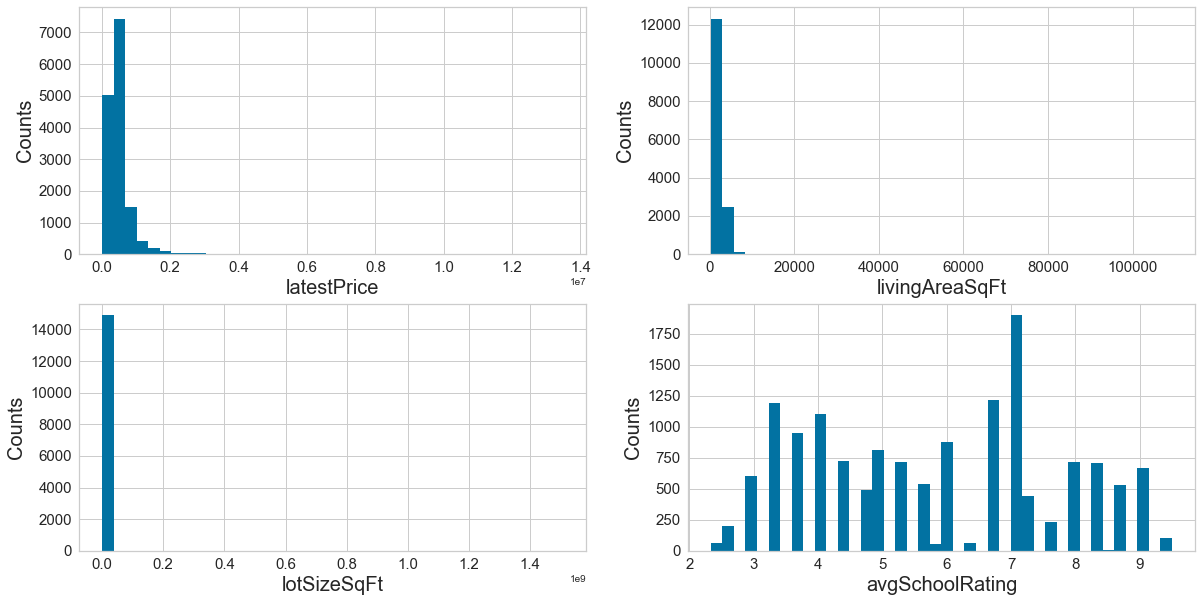

In [23]:
## Make some histograms of your data
## Specify the features of interest
features = ['latestPrice', 'livingAreaSqFt', 'lotSizeSqFt', 'avgSchoolRating']
xaxes = features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(house_df[features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

##### Observation

1. All the histogram charts depicts the variables (home price, living square ft, total lot size square ft) except avgSchoolRating are skewed to the right which means the peak of graph lies to the left side of the center. On the right side of the graph, the frequencies of observations are lower than the frequencies of observations to the left side.
2. The first three histogram charts show the presence of outliers in those variables which caused the histograms to be right-skewed distribution.
3. The histogram for average school rating shows the type as multimode distribution as multiple peaks exist in the chart. The frequency of school rating is high at 7 and least at 2 which makes complete sense 

###### 2. Bar Chart

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. We will create bar chart for some of the below mentioned categorical values.

1. HomeType - Type of the home
2. yearBuilt - Year built
3. numOfBedrooms - Number of bed rooms present in the house
4. numOfBathrooms - Number of bathrooms present in the house
5. zipcode - Zip codes 

<BarContainer object of 10 artists>

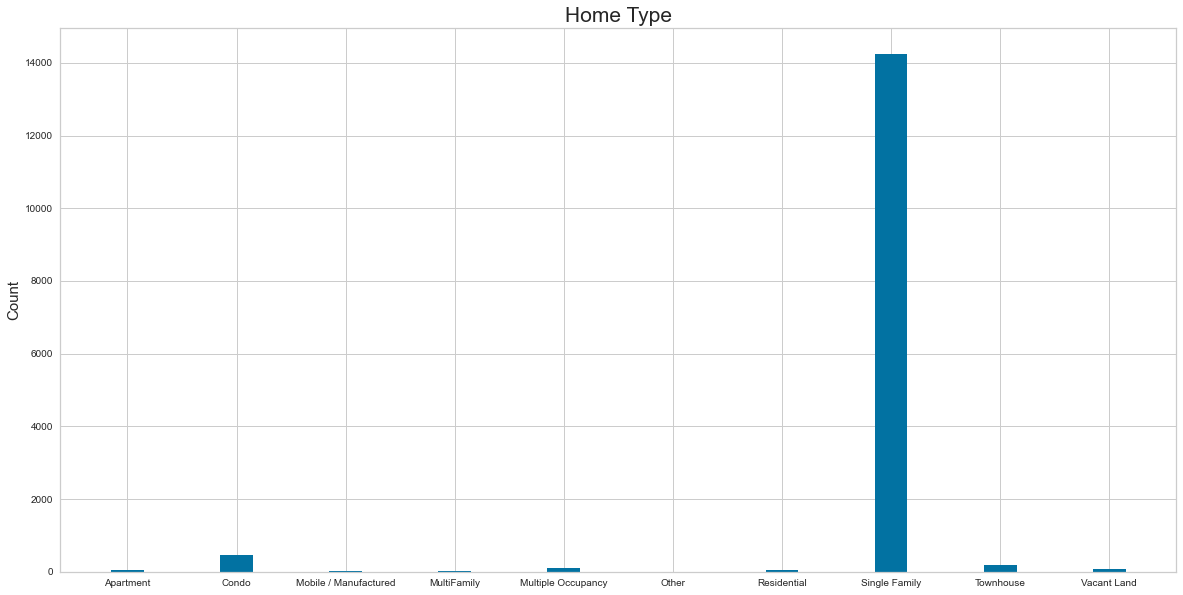

In [75]:
# make the data read to feed into the visulizer
Hometype = plt.figure()
X_HomeType = house_df.groupby('homeType').size().reset_index(name='Counts')['homeType']
Y_HomeType = house_df.groupby('homeType').size().reset_index(name='Counts')['Counts']

plt.title("Home Type", fontsize=21)
plt.ylabel('Count', fontsize=15)
plt.bar(X_HomeType, Y_HomeType, width=0.3)

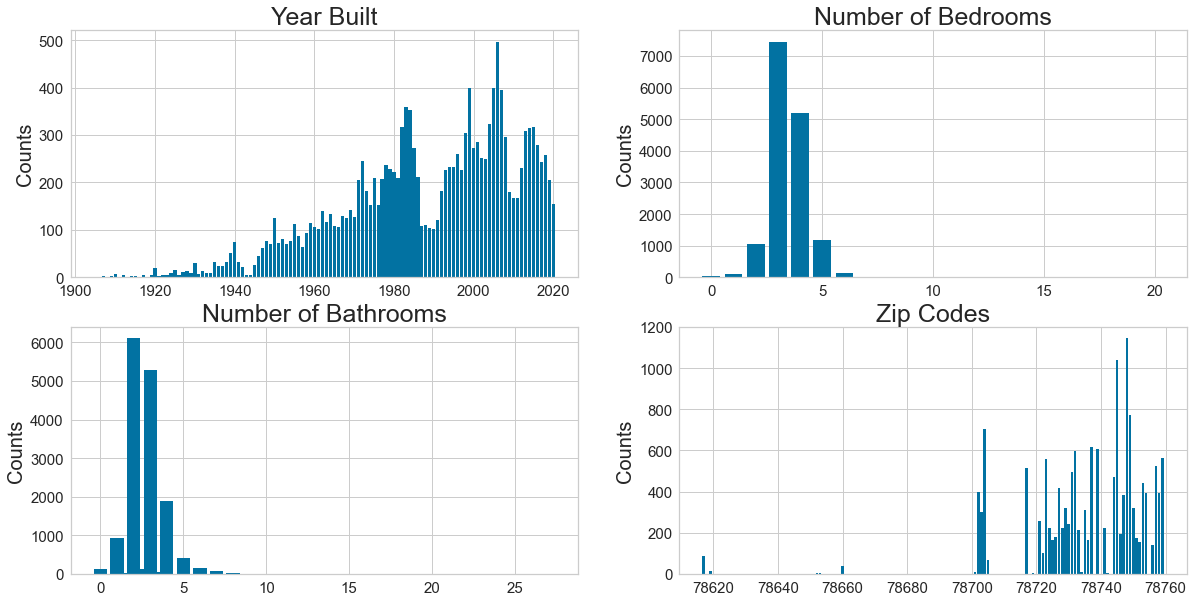

In [80]:
#create a copy of the data frame for use with graphing
df_plots = house_df.copy()

#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Year = df_plots.groupby('yearBuilt').size().reset_index(name='Counts')['yearBuilt']
Y_Year = df_plots.groupby('yearBuilt').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 0].bar(X_Year, Y_Year)
axes[0, 0].set_title('Year Built', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_noofBed = df_plots.groupby('numOfBedrooms').size().reset_index(name='Counts')['numOfBedrooms']
Y_noofBed = df_plots.groupby('numOfBedrooms').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_noofBed, Y_noofBed)
axes[0, 1].set_title('Number of Bedrooms', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_noofBath = df_plots.groupby('numOfBathrooms').size().reset_index(name='Counts')['numOfBathrooms']
Y_noofBath = df_plots.groupby('numOfBathrooms').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_noofBath, Y_noofBath)
axes[1, 0].set_title('Number of Bathrooms', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Zip = df_plots.groupby('zipcode').size().reset_index(name='Counts')['zipcode']
Y_Zip = df_plots.groupby('zipcode').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Zip, Y_Zip)
axes[1, 1].set_title('Zip Codes', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
plt.show()

##### Observation

1. First bar chart shows total number of houses sold for each home type; The dataset has more records for "Single family house" which infers that people are more interested to buy this house type compared to other houses. Condo and Townhouse come next in the list. The number of records for Other home types are very minimal which can be considered as outliers and removed
2. From Year Built bar chart, the houses built after 2000 are sold more compared to the houses built before 2000. The number of houses built aroud 80's also sold more. We will identify the reason while running the model.
3. The number of houses with bedrooms and bathrooms count as 2 and 3 were sold more compare to the houses with different numbers. 
4. The houses present in zip codes greater than 78740 sold more than the houses present in other zip codes. There may be n number of reason. We will figure out during modeling training.

##### 3. Scatter Plot

A scatter plot is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. We will plot scatter chart for the below variables vs price

1. lotSizeSqFt
2. livingAreaSqFt
3. avgSchoolDistance
4. avgSchoolRating
5. numOfPhotos
6. zipcode

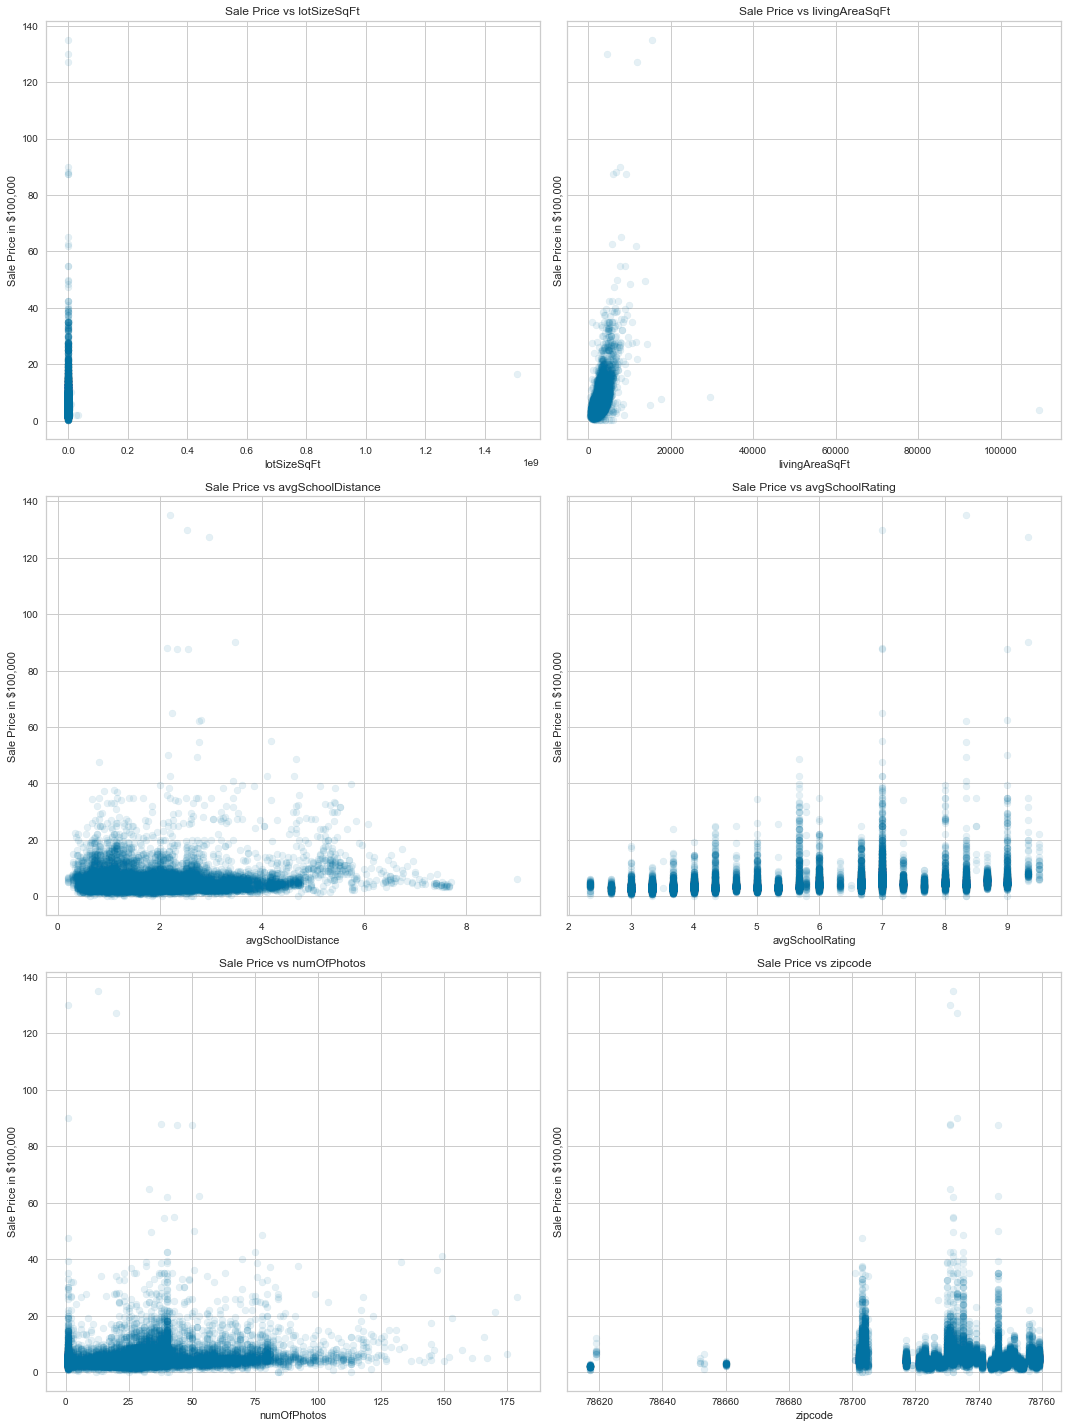

In [79]:
## Defining the number of features to be used for scatter plot
features = ['lotSizeSqFt', 'livingAreaSqFt', 'avgSchoolDistance', 
              'avgSchoolRating','numOfPhotos', 'zipcode']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,20), sharey=True)

for ax, column in zip(axes.flatten(), features):
    ax.scatter(house_df[column], house_df['latestPrice']/100000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')
fig.tight_layout()

##### Observation

1. The first two charts which are plotted between the price of the house and total living and lot size in square ft tells increase in price of the house for increase in living and lot size in square ft. This makes complete sense as bigger house sold for high prices compared to small houses.
2. The second scatter chart which is plotted between the price of the house and school distance depicts the houses nearer to school are sold more compared to the houses which are farest from the house. However, the sale price is evenly distributed across all the distances.
3. The fourth chart which is plotted between price and avg school rating shows the houses having good school rating are sold more compared to the houses having poor ratings.
4. The fifth chart is to find if number of photos shown during the listing plays any role in the price of the house. Based on the chart, it is not significant feature in relation to the price. 
5. Final chart which is plotted between the price and zip code shows the zip code plays a major role in price of the house. The houses present in some of the zip codes were sold for more price compared to te houses present in other zip codes.

##### 4. Heat Map

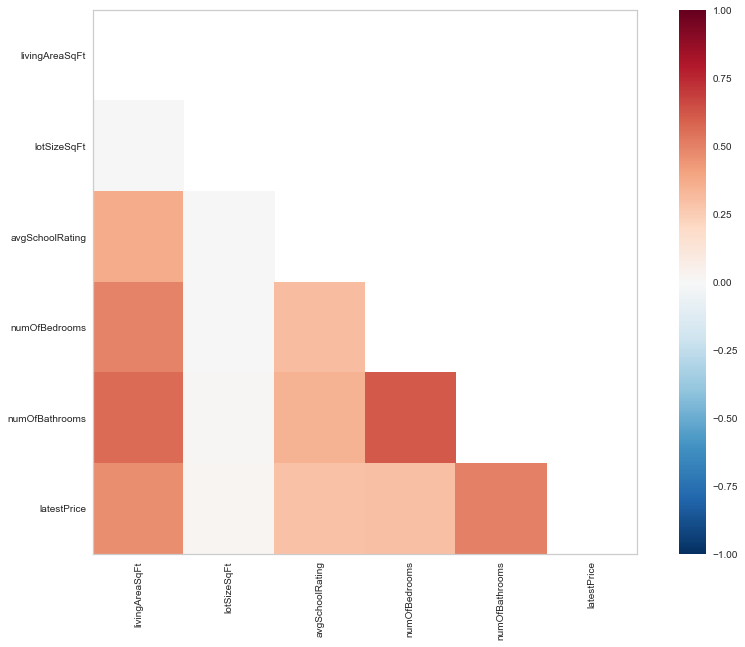

In [82]:
#create a heat map of the Pearson correlation coefficients of the numerical features
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

## Creating a list of features to be includd in heat map
heat_map_features = ['livingAreaSqFt', 'lotSizeSqFt', 'avgSchoolRating','numOfBedrooms','numOfBathrooms','latestPrice']

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = house_df[heat_map_features].values

# instantiate the visualizer 
heat_map = Rank2D(features=heat_map_features, algorithm='pearson')
heat_map.fit_transform(X) #fit and tranform the data for the heat map
plt.show()     

##### Observation

1. Some of the numerical variables like livingAreaSqft and number of bathrooms are having some level of correlation with sold price of the house
2. These variables can be further analyzed and examined during model training

#### Time Series Chart

Text(0, 0.5, 'House Sold Price')

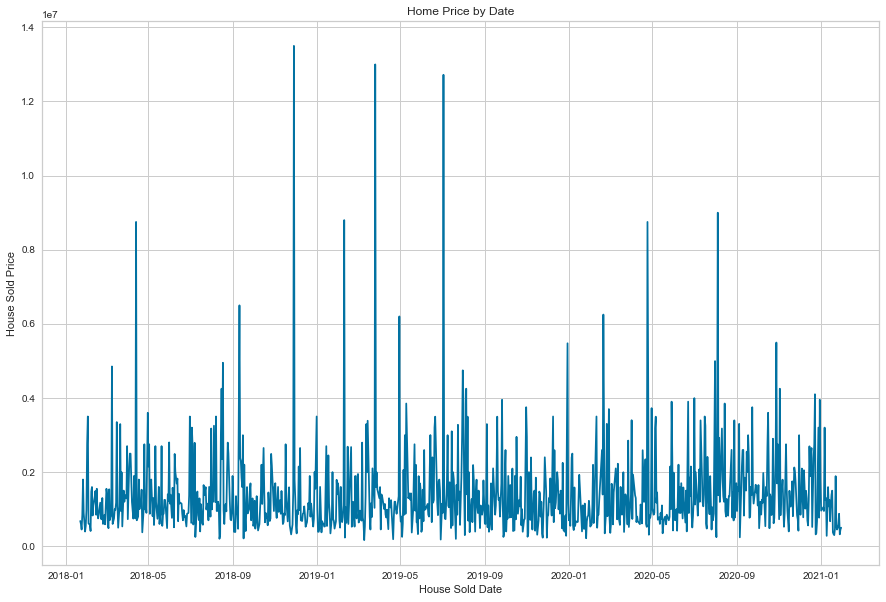

In [109]:
## Copy the dataframe to different dataframe
house_df_ts = house_df[['latest_saledate','latestPrice']]

house_df_ts['latest_saledate'] = pd.to_datetime(house_df_ts['latest_saledate'], format='%Y-%m-%d')
house_df_ts.sort_values(by='latest_saledate')
#house_df_ts_gb = house_df_ts.groupby(['latest_saledate'], sort = True)['latestPrice'].max()

house_df_ts_gb = house_df_ts.loc[house_df_ts.groupby(["latest_saledate"])["latestPrice"].idxmax()]

sold_date = house_df_ts_gb['latest_saledate']
sold_price = house_df_ts_gb['latestPrice']

## Plotting the chart
plt.plot(sold_date, sold_price)

# Giving title to the graph
plt.title('Home Price by Date')

# Giving x and y label to the graph
plt.xlabel('House Sold Date')
plt.ylabel('House Sold Price')

##### Observation

1. I tried to plot the time series chart between the sold price and date to understand the increase/decrease in house price over the time frame of 3 years. 
2. However, the above chart shows there is a fluctuation in the house price over the time; As mentioned earlier, there are some outliers present in the data which might also be the reason for the fluctuation
3. The chart has been plotted by taking the maximum price sold for each date across various zip codes. If we filter the dataset for particular zip code and try to plot, then it would give clear picture of price flow over the time frame.

# Term Project Milestone 2 (Week 8)

Now that you have created your idea, located data, and have started your graphical analysis, you will move on to the data preparation process of your project. After completing Milestone 2, your data should be ready for the model building/evaluation phase.

Explain your process at each step. You can use any methods/tools you think are most appropriate. Do what makes the most sense for your data/problem. This will vary greatly among different projects. Be careful to avoid data snooping in these steps.

Here is a list of steps to consider performing in Milestone 2

#### Step 1: Perform any data extraction/selection steps.

##### Filter the records

In [131]:
## Check percentage of records present for each hometype in dataframe
house_df['homeType'].value_counts(normalize=True)

Single Family            0.938699
Condo                    0.030980
Townhouse                0.011469
Multiple Occupancy       0.006328
Vacant Land              0.005471
Apartment                0.002439
Residential              0.002439
Mobile / Manufactured    0.001121
MultiFamily              0.000659
Other                    0.000395
Name: homeType, dtype: float64

Looking at the percetnage of number of records present for each hometype, we see Single Family, Condo and Townhouse make up most of the data. So, we can ignore other hometypes from the dataset

In [132]:
## Filtering the data for Single Family, Condo and Townhouse home type
house_filter_df = house_df.loc[((house_df['homeType'] == 'Single Family') | (house_df['homeType'] == 'Condo')) | (house_df['homeType'] == 'Townhouse')]

In [133]:
## Count of records for each hometype
house_filter_df.groupby(house_filter_df['homeType']).count()

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
homeType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Condo,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470,470
Single Family,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241,14241
Townhouse,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174


In [134]:
## Total number of records after filter
print("Number of rows and columns present in dataframe: {}".format(house_filter_df.shape))

Number of rows and columns present in dataframe: (14885, 47)


##### Duplicate check

In [135]:
## Check if filtered dataframe has any duplicates
house_filter_df[house_filter_df.duplicated(subset=['latitude','longitude'], keep=False)].sort_values('latitude')

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage


The latitude and longitude fields are unique for each home. So, performed the duplicate checked based on these 2 field and found no duplicates present in data

##### Outlier dectection

In [136]:
## Describe the data to check for any outliers present in any of the field
house_filter_df.describe()

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_salemonth,latest_saleyear,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1.488500e+04,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,1.488500e+04,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,1.488500e+04,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000
mean,1.043226e+08,78736.002889,30.291861,-97.778845,1.994189,1.228015,1.227410,1988.720188,5.118313e+05,3.032986,6.722808,2019.077125,30.830433,0.013235,3.490359,1.709842,0.667854,0.472556,0.002620,0.210749,0.011757,1.207959e+05,2205.469735,0.941082,0.048774,1.034934,0.977628,1.839899,5.791818,1240.229896,14.868525,2.696604,3.441585,1.469332
std,3.170740e+08,18.878188,0.097289,0.084900,0.053282,1.342014,1.342142,21.502760,4.413477e+05,2.481655,3.137753,0.813562,21.184201,0.181144,1.868598,0.778982,0.983397,0.828560,0.059615,0.490701,0.113856,1.236986e+07,1367.932682,0.235765,0.234230,0.260216,0.292515,1.066946,1.859997,325.650322,1.742950,1.025757,0.811867,0.523901
min,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,1.000000,2018.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+02,300.000000,0.000000,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.941135e+07,78727.000000,30.202938,-97.838699,1.980000,0.000000,0.000000,1975.000000,3.090000e+05,1.000000,4.000000,2018.000000,20.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.534000e+03,1485.000000,1.000000,0.000000,1.000000,1.000000,1.100000,4.000000,983.000000,14.000000,2.000000,3.000000,1.000000
50%,2.949520e+07,78739.000000,30.285215,-97.769783,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,7.000000,2019.000000,29.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.232000e+03,1976.000000,1.000000,0.000000,1.000000,1.000000,1.566667,6.000000,1298.000000,15.000000,3.000000,3.000000,1.000000
75%,7.033872e+07,78749.000000,30.367332,-97.718246,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,9.000000,2020.000000,39.000000,0.000000,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.089000e+04,2687.000000,1.000000,0.000000,1.000000,1.000000,2.266667,7.000000,1506.000000,16.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517174,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,12.000000,2021.000000,179.000000,8.000000,10.000000,6.000000,8.000000,6.000000,2.000000,4.000000,3.000000,1.508483e+09,109292.000000,2.000000,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


Looking at the charts, we see outliers present in total lot size and total living area in square foot. We will analyze further and ignore if those records are really outliers.

In [137]:
#check what is going on with the lotSizeSqFt outliers by sorting descending
house_filter_df[['lotSizeSqFt']].sort_values('lotSizeSqFt', ascending=False).head(10)

,lotSizeSqFt
14654,1.508483e+09
9244,3.415452e+07
11116,2.617956e+07
2340,8.712000e+06
4635,8.581320e+06
8071,5.967720e+06
3549,5.902380e+06
869,5.880600e+06
1703,2.988216e+06
1610,2.988216e+06


In [138]:
#check what is going on with the lotSizeSqFt outliers by sorting ascending as well
house_filter_df[['lotSizeSqFt']].sort_values('lotSizeSqFt', ascending=True).head(10)

,lotSizeSqFt
9217,100.0
9212,100.0
11989,113.0
10475,117.0
9231,217.0
8959,392.0
3628,392.0
3666,392.0
3656,396.0
3647,400.0


In [139]:
## We will similar fashion for livingSqft as well
## Order the data in descending
house_filter_df[['livingAreaSqFt']].sort_values('livingAreaSqFt', ascending=False).head(5)

,livingAreaSqFt
705,109292.0
2557,29440.0
2316,15394.0
5328,14091.0
375,13731.0


In [140]:
## Order the data in ascending
house_filter_df[['livingAreaSqFt']].sort_values('livingAreaSqFt', ascending=True).head(5)

,livingAreaSqFt
1170,300.0
3518,306.0
13314,378.0
9213,450.0
10118,450.0


In [141]:
## Based on the result, we see the living area square foot for 705 and 2557 are incorrect. So, remove the same from the dataset
house_filter_df.drop(index=[705, 2557], inplace=True)

In [142]:
## Moreover, the lot size less than 500 square ft doesn't make sense; So, filter the same from the dataframe
house_filter_df = house_filter_df[house_filter_df['lotSizeSqFt'] >= 500]

In [143]:
## Calculating the size of dataframe after filter the records
house_filter_df.shape

(14869, 47)

In [144]:
## Checking the outiers for numOfBathrooms
house_filter_df[['numOfBedrooms','numOfBathrooms']].sort_values('numOfBathrooms', ascending=False).head(5)

,numOfBedrooms,numOfBathrooms
2838,4,27.0
2316,6,13.0
5328,6,10.0
375,5,10.0
613,6,10.0


In [145]:
## Checking the outiers for numOfBathrooms
house_filter_df[['numOfBedrooms','numOfBathrooms']].sort_values('numOfBathrooms', ascending=True).head(5)

,numOfBedrooms,numOfBathrooms
6252,5,0.0
6646,0,0.0
1842,0,0.0
2223,4,0.0
12993,5,0.0


From the above results, it is clear that a house with 27 bathrooms cannot be possible. So, we will remove that entry from the dataframe. In addition, some of the houses have 0 bathrooms and bedrooms. I will filter those entries as well

In [146]:
## Removing the record having 27 bathroom count
house_filter_df.drop(index=[2838], inplace=True)

In [147]:
## Filtering the house having 0 bathrooms
house_filter_df = house_filter_df[house_filter_df['numOfBathrooms'] != 0]

In [148]:
## Filtering the house having 0 bedrooms
house_filter_df = house_filter_df[house_filter_df['numOfBedrooms'] != 0]

In [149]:
## Calculating the size of dataframe after bedroom and bathroom filter
house_filter_df.shape

(14839, 47)

In [150]:
## Checking the outiers for numOfBathrooms
house_filter_df[['numOfBedrooms','numOfBathrooms']].sort_values('numOfBedrooms', ascending=False).head(5)

,numOfBedrooms,numOfBathrooms
8597,20,2.0
8531,8,4.0
2547,7,10.0
4827,7,7.0
9314,7,7.0


In [151]:
## The house with 20 bedrooms cannot be possible. So, updating the same to 2 instead of 20
house_filter_df.loc[house_filter_df.index==8597, 'numOfBedrooms'] = 2

In [152]:
#check what is going on with the garageSpaces outliers by sorting descending
house_filter_df[['homeType','garageSpaces','latestPrice']].sort_values('garageSpaces', ascending=False).head(10)

,homeType,garageSpaces,latestPrice
6885,Condo,22,399000.0
4533,Single Family,20,824900.0
6985,Single Family,12,328000.0
11108,Single Family,12,500000.0
6805,Single Family,12,525000.0
9240,Single Family,12,3400000.0
4777,Single Family,12,1595000.0
9201,Single Family,10,279900.0
14875,Single Family,10,450000.0
1613,Single Family,10,775000.0


In [153]:
## The garage spaces are definitely just wrong numbers. I'm going to force change a lot of them to numbers that make sense
house_filter_df.loc[(house_filter_df['garageSpaces'] > 3) & (house_filter_df['latestPrice'] < 1000000) & (house_filter_df['homeType'] == 'Single Family'), 'garageSpaces'] = 3
house_filter_df.loc[(house_filter_df['garageSpaces'] > 5) & (house_filter_df['latestPrice'] > 1000000)& (house_filter_df['homeType'] == 'Single Family'), 'garageSpaces'] = 4
house_filter_df.loc[house_filter_df.index==6885, 'garageSpaces'] = 2

In [154]:
## Checking garage spaces after transformation
house_filter_df[['homeType','garageSpaces','latestPrice']].sort_values('garageSpaces', ascending=False).head(10)

,homeType,garageSpaces,latestPrice
2473,Single Family,5,1150000.0
4753,Single Family,5,2190000.0
6113,Single Family,5,2500000.0
13910,Single Family,5,3450000.0
5767,Single Family,5,1295000.0
2881,Single Family,5,1100000.0
4865,Single Family,5,2250000.0
5381,Single Family,5,2500000.0
3018,Single Family,5,1495000.0
14605,Single Family,5,1000000.0


#### Step 2: Drop any features that are not useful for your model building and explain why they are not useful.

For the square footage variables, I ultimately concluded that extremely large houses and lots are so seriously under-represented in the dataset that we won't be able to reliably predict on them anyway and they are better left off. So, I opt to remove via IQR on these items. 

In [155]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1, Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [156]:
# determing our IQR for lot size and livingarea sq footage 
lotlower, lotupper = outlier_treatment(house_filter_df.lotSizeSqFt)
sqftlower, sqftupper = outlier_treatment(house_filter_df.livingAreaSqFt)

In [157]:
# dropping the things outside of our lower and upper range
house_filter_df.drop(house_filter_df[(house_filter_df.lotSizeSqFt > lotupper) | (house_filter_df.lotSizeSqFt < lotlower) ].index , inplace=True)
house_filter_df.drop(house_filter_df[(house_filter_df.livingAreaSqFt > sqftupper) | (house_filter_df.livingAreaSqFt < sqftlower) ].index , inplace=True)

In [158]:
## Calculating the total number of rows and columns
house_filter_df.shape

(13451, 47)

In [159]:
## The house price under 75k can also be ignored as it doesn't add legitimate market value sale. 
## Dropping those records as well
house_filter_df.drop(house_filter_df.loc[(house_filter_df['latestPrice'] <= 75000)].index, axis=0, inplace=True)

In [160]:
## Calculating the total number of rows and columns
house_filter_df.shape

(13428, 47)

Out of 47 features present in the dataset, I feel below features doesn't make sense to be present in the dataframe and can be removed.

1. zpid: Identifier field
2. streetAddress: Address can be ignored as we considered zipcode and city
3. description: Description of the house; This doesn't make sense.
4. hasSpa: I feel spa feature is least feature while considering the house purchase
5. latest_salemonth: Sale date is present in the dataset; So, this can be ignored
6. latest_saleyear: Sales date is present in the dataset; So, this can be ignored
7. MedianStudentsPerTeacher: School rating is significant feature compared to MedianStudentsPerTeacher. So, this feature can be ignored. 
8. homeImage: This field contains image of the house.This can be ignored as this doesn't make sense.
9. numOfWindowFeatures: I feel this is leaset feature while considering house 
10. numOfWaterfrontFeatures: I feel this is leaset feature while considering house
11. numOfAccessibilityFeatures: I feel this is leaset feature while considering house
12. latestPriceSource: I believe most of the people wouldn't look for the source of listing
13. hasView: I believe this feature also contributes least to house price and can be ignored 

In [161]:
## Removing unwanted features from the dataframe
listOfColsRemove = ['zpid','streetAddress','description','hasSpa','hasView','latest_salemonth','latest_saleyear','MedianStudentsPerTeacher','homeImage','numOfWindowFeatures','numOfWaterfrontFeatures','numOfAccessibilityFeatures','latestPriceSource']
house_drop_df = house_filter_df.drop(listOfColsRemove, axis=1)

In [162]:
## Number of rows and columns present in the data
print("Number of rows and columns present in the dataframe after removing unwanted features: {}".format(house_drop_df.shape))

Number of rows and columns present in the dataframe after removing unwanted features: (13428, 34)


#### Step 3: Deal with missing data (do not just drop rows or columns without justifying this).

In [163]:
## Looking for null values in any of the column
house_filter_df.isna().sum()

zpid                          0
city                          0
streetAddress                 0
zipcode                       0
description                   0
latitude                      0
longitude                     0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
latestPrice                   0
numPriceChanges               0
latest_saledate               0
latest_salemonth              0
latest_saleyear               0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numOfWaterfrontFeatures       0
numOfWin

<b>The dataset doesn't have any null values for any of the fields. So, there is no need for any transformation to populate the null values present in the dataset.</b>

#### Step 4: Transform features if necessary.

In [164]:
## Displaying the datatype of each variable present in the dataframe
house_drop_df.dtypes

city                           object
zipcode                         int64
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
latest_saledate                object
numOfPhotos                     int64
numOfAppliances                 int64
numOfParkingFeatures            int64
numOfPatioAndPorchFeatures      int64
numOfSecurityFeatures           int64
numOfCommunityFeatures          int64
lotSizeSqFt                   float64
livingAreaSqFt                float64
numOfPrimarySchools             int64
numOfElementarySchools          int64
numOfMiddleS

From the above result, we see some of the features are populated with boolean (True/False) values. So, we will convert those Boolean values into 1 and 0 for model training.

In [165]:
## Converting boolean values to 0 and 1.
listOfBoolean = ['hasAssociation','hasCooling','hasGarage','hasHeating']
for col in listOfBoolean:
    house_drop_df[col] = house_drop_df[col].astype(int)

In [166]:
## Printing the datatypes of the dataframe
house_drop_df.dtypes

city                           object
zipcode                         int64
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                  int32
hasCooling                      int32
hasGarage                       int32
hasHeating                      int32
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
latest_saledate                object
numOfPhotos                     int64
numOfAppliances                 int64
numOfParkingFeatures            int64
numOfPatioAndPorchFeatures      int64
numOfSecurityFeatures           int64
numOfCommunityFeatures          int64
lotSizeSqFt                   float64
livingAreaSqFt                float64
numOfPrimarySchools             int64
numOfElementarySchools          int64
numOfMiddleS

In [167]:
## Displaying few records present in the dataframe
house_drop_df.head()

,city,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,numOfPhotos,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,numOfBathrooms,numOfBedrooms,numOfStories
0,pflugerville,78660,30.430632,-97.663078,1.98,2,1,1,1,1,Single Family,2,2012,305000.0,5,2019-09-02,39,5,2,1,3,0,6011.0,2601.0,1,0,1,1,1.266667,2.666667,1063,3.0,4,2
1,pflugerville,78660,30.432673,-97.661697,1.98,2,1,1,1,1,Single Family,2,2013,295000.0,1,2020-10-13,29,1,2,0,0,0,6185.0,1768.0,1,0,1,1,1.400000,2.666667,1063,2.0,4,1
2,pflugerville,78660,30.409748,-97.639771,1.98,0,1,1,0,1,Single Family,0,2018,256125.0,1,2019-07-31,2,4,1,0,1,0,7840.0,1478.0,0,2,1,1,1.200000,3.000000,1108,2.0,3,1
3,pflugerville,78660,30.432112,-97.661659,1.98,2,1,1,1,1,Single Family,2,2013,240000.0,4,2018-08-08,9,0,2,0,0,0,6098.0,1678.0,1,0,1,1,1.400000,2.666667,1063,2.0,3,1
4,pflugerville,78660,30.437368,-97.656860,1.98,0,1,1,0,1,Single Family,0,2002,239900.0,3,2018-10-31,27,0,1,0,0,0,6708.0,2132.0,1,0,1,1,1.133333,4.000000,1223,3.0,3,2


#### Step 5: Engineer new useful features.

Price per suare foot feature is not present in the dataset. I believe it would be useful information to include  in the dataset to filter the outlier present in the dataset. This is calculated by latestPrice or sold price divided by livingAreaSqft (latestPrice/livingAreaSqFt)

In [168]:
# Add a variable price/sqft to the dataframe which is calculated based on price/livingAreaSqFt
house_drop_df['pr_sqft'] = house_drop_df.apply(lambda x: round( (x['latestPrice'] / x['livingAreaSqFt'] ), 0), axis=1 )

In [169]:
## Displaying few records from the dataframe
house_drop_df.head()

,city,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,numOfPhotos,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,numOfBathrooms,numOfBedrooms,numOfStories,pr_sqft
0,pflugerville,78660,30.430632,-97.663078,1.98,2,1,1,1,1,Single Family,2,2012,305000.0,5,2019-09-02,39,5,2,1,3,0,6011.0,2601.0,1,0,1,1,1.266667,2.666667,1063,3.0,4,2,117.0
1,pflugerville,78660,30.432673,-97.661697,1.98,2,1,1,1,1,Single Family,2,2013,295000.0,1,2020-10-13,29,1,2,0,0,0,6185.0,1768.0,1,0,1,1,1.400000,2.666667,1063,2.0,4,1,167.0
2,pflugerville,78660,30.409748,-97.639771,1.98,0,1,1,0,1,Single Family,0,2018,256125.0,1,2019-07-31,2,4,1,0,1,0,7840.0,1478.0,0,2,1,1,1.200000,3.000000,1108,2.0,3,1,173.0
3,pflugerville,78660,30.432112,-97.661659,1.98,2,1,1,1,1,Single Family,2,2013,240000.0,4,2018-08-08,9,0,2,0,0,0,6098.0,1678.0,1,0,1,1,1.400000,2.666667,1063,2.0,3,1,143.0
4,pflugerville,78660,30.437368,-97.656860,1.98,0,1,1,0,1,Single Family,0,2002,239900.0,3,2018-10-31,27,0,1,0,0,0,6708.0,2132.0,1,0,1,1,1.133333,4.000000,1223,3.0,3,2,113.0


In [170]:
#dropping irrationally high pr/sqft
house_drop_df.drop(house_drop_df[house_drop_df['pr_sqft']>1000].index, inplace=True)

In [171]:
## Calculating the total number of rows and columns
house_drop_df.shape

(13417, 35)

In [172]:
# Any element that has no features by the 50th percentile is getting converted to a binary 
# change all non-null values > 0 in those columns to 1
house_drop_df.loc[house_drop_df['numOfPatioAndPorchFeatures'] > 0, 'numOfPatioAndPorchFeatures'] = 1
house_drop_df.loc[house_drop_df['numOfSecurityFeatures'] > 0, 'numOfSecurityFeatures'] = 1
house_drop_df.loc[house_drop_df['numOfCommunityFeatures'] > 0, 'numOfCommunityFeatures'] = 1

In [173]:
## Rename the columns where we converted to 0 and 1
house_drop_df.rename(columns={'numOfPatioAndPorchFeatures' : 'patioporch', 'numOfSecurityFeatures': 'security', 'numOfCommunityFeatures' : 'community'}, inplace=True)

In [174]:
## Printing the column values and datatype
house_drop_df.dtypes

city                       object
zipcode                     int64
latitude                  float64
longitude                 float64
propertyTaxRate           float64
garageSpaces                int64
hasAssociation              int32
hasCooling                  int32
hasGarage                   int32
hasHeating                  int32
homeType                   object
parkingSpaces               int64
yearBuilt                   int64
latestPrice               float64
numPriceChanges             int64
latest_saledate            object
numOfPhotos                 int64
numOfAppliances             int64
numOfParkingFeatures        int64
patioporch                  int64
security                    int64
community                   int64
lotSizeSqFt               float64
livingAreaSqFt            float64
numOfPrimarySchools         int64
numOfElementarySchools      int64
numOfMiddleSchools          int64
numOfHighSchools            int64
avgSchoolDistance         float64
avgSchoolRatin

In [175]:
## Displaying few records
house_drop_df.head()

,city,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,numOfPhotos,numOfAppliances,numOfParkingFeatures,patioporch,security,community,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,numOfBathrooms,numOfBedrooms,numOfStories,pr_sqft
0,pflugerville,78660,30.430632,-97.663078,1.98,2,1,1,1,1,Single Family,2,2012,305000.0,5,2019-09-02,39,5,2,1,1,0,6011.0,2601.0,1,0,1,1,1.266667,2.666667,1063,3.0,4,2,117.0
1,pflugerville,78660,30.432673,-97.661697,1.98,2,1,1,1,1,Single Family,2,2013,295000.0,1,2020-10-13,29,1,2,0,0,0,6185.0,1768.0,1,0,1,1,1.400000,2.666667,1063,2.0,4,1,167.0
2,pflugerville,78660,30.409748,-97.639771,1.98,0,1,1,0,1,Single Family,0,2018,256125.0,1,2019-07-31,2,4,1,0,1,0,7840.0,1478.0,0,2,1,1,1.200000,3.000000,1108,2.0,3,1,173.0
3,pflugerville,78660,30.432112,-97.661659,1.98,2,1,1,1,1,Single Family,2,2013,240000.0,4,2018-08-08,9,0,2,0,0,0,6098.0,1678.0,1,0,1,1,1.400000,2.666667,1063,2.0,3,1,143.0
4,pflugerville,78660,30.437368,-97.656860,1.98,0,1,1,0,1,Single Family,0,2002,239900.0,3,2018-10-31,27,0,1,0,0,0,6708.0,2132.0,1,0,1,1,1.133333,4.000000,1223,3.0,3,2,113.0


array([[<AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'propertyTaxRate'}>,
        <AxesSubplot:title={'center':'garageSpaces'}>,
        <AxesSubplot:title={'center':'hasAssociation'}>],
       [<AxesSubplot:title={'center':'hasCooling'}>,
        <AxesSubplot:title={'center':'hasGarage'}>,
        <AxesSubplot:title={'center':'hasHeating'}>,
        <AxesSubplot:title={'center':'parkingSpaces'}>,
        <AxesSubplot:title={'center':'yearBuilt'}>,
        <AxesSubplot:title={'center':'latestPrice'}>],
       [<AxesSubplot:title={'center':'numPriceChanges'}>,
        <AxesSubplot:title={'center':'numOfPhotos'}>,
        <AxesSubplot:title={'center':'numOfAppliances'}>,
        <AxesSubplot:title={'center':'numOfParkingFeatures'}>,
        <AxesSubplot:title={'center':'patioporch'}>,
        <AxesSubplot:title={'center':'security'}>],
       [<AxesSubp

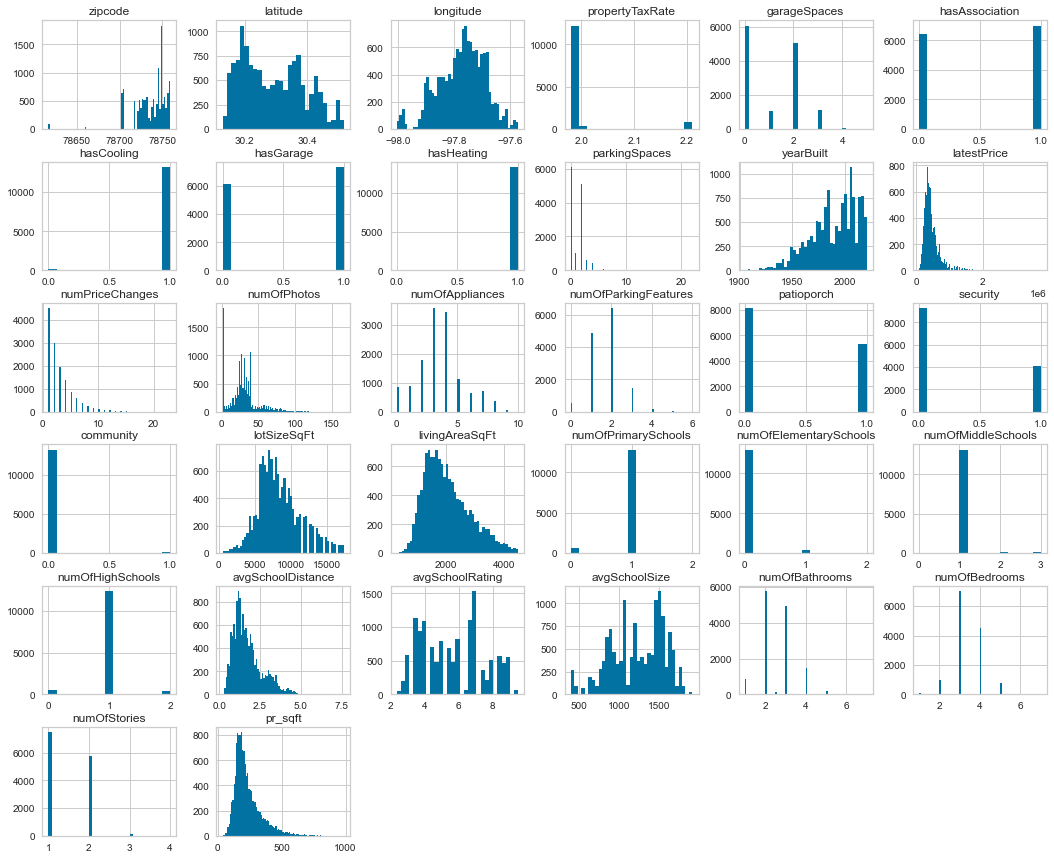

In [176]:
## Plotting the histogram
house_drop_df.hist(figsize=(18,15), bins='auto')

#### Step 6: Create dummy variables if necessary

In [177]:
## Converting zipcode feature to string from integer
house_drop_df['zipcode'] = house_drop_df['zipcode'].astype(str)

In [178]:
## Showing the datatype for each column
house_drop_df.dtypes

city                       object
zipcode                    object
latitude                  float64
longitude                 float64
propertyTaxRate           float64
garageSpaces                int64
hasAssociation              int32
hasCooling                  int32
hasGarage                   int32
hasHeating                  int32
homeType                   object
parkingSpaces               int64
yearBuilt                   int64
latestPrice               float64
numPriceChanges             int64
latest_saledate            object
numOfPhotos                 int64
numOfAppliances             int64
numOfParkingFeatures        int64
patioporch                  int64
security                    int64
community                   int64
lotSizeSqFt               float64
livingAreaSqFt            float64
numOfPrimarySchools         int64
numOfElementarySchools      int64
numOfMiddleSchools          int64
numOfHighSchools            int64
avgSchoolDistance         float64
avgSchoolRatin

In [179]:
## Create dummy variables for categorical variables
catCols = ['zipcode','city','homeType']
house_dummy_df = pd.get_dummies(house_drop_df, columns=catCols)

In [180]:
## Displaying sample records from dataframe
house_dummy_df.head()

,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,numOfPhotos,numOfAppliances,numOfParkingFeatures,patioporch,security,community,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,numOfBathrooms,numOfBedrooms,numOfStories,pr_sqft,zipcode_78617,zipcode_78652,zipcode_78653,zipcode_78660,zipcode_78701,zipcode_78702,zipcode_78703,zipcode_78704,zipcode_78705,zipcode_78717,zipcode_78719,zipcode_78721,zipcode_78722,zipcode_78723,zipcode_78724,zipcode_78725,zipcode_78726,zipcode_78727,zipcode_78728,zipcode_78729,zipcode_78730,zipcode_78731,zipcode_78732,zipcode_78733,zipcode_78734,zipcode_78735,zipcode_78736,zipcode_78737,zipcode_78738,zipcode_78739,zipcode_78741,zipcode_78742,zipcode_78744,zipcode_78745,zipcode_78746,zipcode_78747,zipcode_78748,zipcode_78749,zipcode_78750,zipcode_78751,zipcode_78752,zipcode_78753,zipcode_78754,zipcode_78756,zipcode_78757,zipcode_78758,zipcode_78759,city_austin,city_del valle,city_manchaca,city_manor,city_pflugerville,city_west lake hills,homeType_Condo,homeType_Single Family,homeType_Townhouse
0,30.430632,-97.663078,1.98,2,1,1,1,1,2,2012,305000.0,5,2019-09-02,39,5,2,1,1,0,6011.0,2601.0,1,0,1,1,1.266667,2.666667,1063,3.0,4,2,117.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,30.432673,-97.661697,1.98,2,1,1,1,1,2,2013,295000.0,1,2020-10-13,29,1,2,0,0,0,6185.0,1768.0,1,0,1,1,1.400000,2.666667,1063,2.0,4,1,167.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,30.409748,-97.639771,1.98,0,1,1,0,1,0,2018,256125.0,1,2019-07-31,2,4,1,0,1,0,7840.0,1478.0,0,2,1,1,1.200000,3.000000,1108,2.0,3,1,173.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,30.432112,-97.661659,1.98,2,1,1,1,1,2,2013,240000.0,4,2018-08-08,9,0,2,0,0,0,6098.0,1678.0,1,0,1,1,1.400000,2.666667,1063,2.0,3,1,143.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,30.437368,-97.656860,1.98,0,1,1,0,1,0,2002,239900.0,3,2018-10-31,27,0,1,0,0,0,6708.0,2132.0,1,0,1,1,1.133333,4.000000,1223,3.0,3,2,113.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [181]:
## Printing number of rows and columns in the dataframe
print("Number of rows and columns present in dataframe: {}".format(house_dummy_df.shape))

Number of rows and columns present in dataframe: (13417, 88)


In [182]:
## Prinint all the columns present in the dataframe
for col in house_dummy_df.columns:
    print(col)

latitude
longitude
propertyTaxRate
garageSpaces
hasAssociation
hasCooling
hasGarage
hasHeating
parkingSpaces
yearBuilt
latestPrice
numPriceChanges
latest_saledate
numOfPhotos
numOfAppliances
numOfParkingFeatures
patioporch
security
community
lotSizeSqFt
livingAreaSqFt
numOfPrimarySchools
numOfElementarySchools
numOfMiddleSchools
numOfHighSchools
avgSchoolDistance
avgSchoolRating
avgSchoolSize
numOfBathrooms
numOfBedrooms
numOfStories
pr_sqft
zipcode_78617
zipcode_78652
zipcode_78653
zipcode_78660
zipcode_78701
zipcode_78702
zipcode_78703
zipcode_78704
zipcode_78705
zipcode_78717
zipcode_78719
zipcode_78721
zipcode_78722
zipcode_78723
zipcode_78724
zipcode_78725
zipcode_78726
zipcode_78727
zipcode_78728
zipcode_78729
zipcode_78730
zipcode_78731
zipcode_78732
zipcode_78733
zipcode_78734
zipcode_78735
zipcode_78736
zipcode_78737
zipcode_78738
zipcode_78739
zipcode_78741
zipcode_78742
zipcode_78744
zipcode_78745
zipcode_78746
zipcode_78747
zipcode_78748
zipcode_78749
zipcode_78750
zipcode_

In [355]:
#### Creating a final dataframe copying from house_dummy_df
house_final_df = house_dummy_df.copy()

In [356]:
## Number of records
house_final_df.shape

(13417, 88)

In [357]:
## Displaying few records in the dataframe
house_final_df.head()

,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,numOfPhotos,numOfAppliances,numOfParkingFeatures,patioporch,security,community,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,numOfBathrooms,numOfBedrooms,numOfStories,pr_sqft,zipcode_78617,zipcode_78652,zipcode_78653,zipcode_78660,zipcode_78701,zipcode_78702,zipcode_78703,zipcode_78704,zipcode_78705,zipcode_78717,zipcode_78719,zipcode_78721,zipcode_78722,zipcode_78723,zipcode_78724,zipcode_78725,zipcode_78726,zipcode_78727,zipcode_78728,zipcode_78729,zipcode_78730,zipcode_78731,zipcode_78732,zipcode_78733,zipcode_78734,zipcode_78735,zipcode_78736,zipcode_78737,zipcode_78738,zipcode_78739,zipcode_78741,zipcode_78742,zipcode_78744,zipcode_78745,zipcode_78746,zipcode_78747,zipcode_78748,zipcode_78749,zipcode_78750,zipcode_78751,zipcode_78752,zipcode_78753,zipcode_78754,zipcode_78756,zipcode_78757,zipcode_78758,zipcode_78759,city_austin,city_del valle,city_manchaca,city_manor,city_pflugerville,city_west lake hills,homeType_Condo,homeType_Single Family,homeType_Townhouse
0,30.43,-97.66,1.98,2,1,1,1,1,2,2012,305000.00,5,2019-09-02,39,5,2,1,1,0,6011.00,2601.00,1,0,1,1,1.27,2.67,1063,3.00,4,2,117.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,30.43,-97.66,1.98,2,1,1,1,1,2,2013,295000.00,1,2020-10-13,29,1,2,0,0,0,6185.00,1768.00,1,0,1,1,1.40,2.67,1063,2.00,4,1,167.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,30.41,-97.64,1.98,0,1,1,0,1,0,2018,256125.00,1,2019-07-31,2,4,1,0,1,0,7840.00,1478.00,0,2,1,1,1.20,3.00,1108,2.00,3,1,173.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,30.43,-97.66,1.98,2,1,1,1,1,2,2013,240000.00,4,2018-08-08,9,0,2,0,0,0,6098.00,1678.00,1,0,1,1,1.40,2.67,1063,2.00,3,1,143.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,30.44,-97.66,1.98,0,1,1,0,1,0,2002,239900.00,3,2018-10-31,27,0,1,0,0,0,6708.00,2132.00,1,0,1,1,1.13,4.00,1223,3.00,3,2,113.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


#### Summary

 1. Dropped unnecessary features from the dataset
 2. Created dummy variables for the categorical data
 3. Added useful feature which helps in filtering the data
 4. Checked for duplicates and null records present in the dataset

# Term Project Milestone 3 (Week 10)

In Milestone 3, you will begin the process of selecting, building, and evaluating a model. You are required to train and evaluate at least one model in this milestone. Write step-by-step for performing each of these steps. You can use any methods/tools you think are most appropriate, but you should explain/justify why you are selecting the model(s) and evaluation metric(s) you choose. It is important to think about what type of model and metric makes sense for your problem. Again, do what makes the most sense for your project. Write a short overview/conclusion of the insights gained from your model building/evaluation.

##### Step 1: Analyze the target variable "latestPrice"

In [358]:
## Before analyzing the latestPrice column, we will rearrange the column by bringing to the front and rename it as Price
## Bringing the latest price field to the beginning of the dataframe
price_col = house_final_df.pop('latestPrice')
house_final_df.insert(0, 'Price', price_col)

In [359]:
## Priting few records from dataframe
house_final_df.head()

,Price,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,parkingSpaces,yearBuilt,numPriceChanges,latest_saledate,numOfPhotos,numOfAppliances,numOfParkingFeatures,patioporch,security,community,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,numOfBathrooms,numOfBedrooms,numOfStories,pr_sqft,zipcode_78617,zipcode_78652,zipcode_78653,zipcode_78660,zipcode_78701,zipcode_78702,zipcode_78703,zipcode_78704,zipcode_78705,zipcode_78717,zipcode_78719,zipcode_78721,zipcode_78722,zipcode_78723,zipcode_78724,zipcode_78725,zipcode_78726,zipcode_78727,zipcode_78728,zipcode_78729,zipcode_78730,zipcode_78731,zipcode_78732,zipcode_78733,zipcode_78734,zipcode_78735,zipcode_78736,zipcode_78737,zipcode_78738,zipcode_78739,zipcode_78741,zipcode_78742,zipcode_78744,zipcode_78745,zipcode_78746,zipcode_78747,zipcode_78748,zipcode_78749,zipcode_78750,zipcode_78751,zipcode_78752,zipcode_78753,zipcode_78754,zipcode_78756,zipcode_78757,zipcode_78758,zipcode_78759,city_austin,city_del valle,city_manchaca,city_manor,city_pflugerville,city_west lake hills,homeType_Condo,homeType_Single Family,homeType_Townhouse
0,305000.00,30.43,-97.66,1.98,2,1,1,1,1,2,2012,5,2019-09-02,39,5,2,1,1,0,6011.00,2601.00,1,0,1,1,1.27,2.67,1063,3.00,4,2,117.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,295000.00,30.43,-97.66,1.98,2,1,1,1,1,2,2013,1,2020-10-13,29,1,2,0,0,0,6185.00,1768.00,1,0,1,1,1.40,2.67,1063,2.00,4,1,167.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,256125.00,30.41,-97.64,1.98,0,1,1,0,1,0,2018,1,2019-07-31,2,4,1,0,1,0,7840.00,1478.00,0,2,1,1,1.20,3.00,1108,2.00,3,1,173.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,240000.00,30.43,-97.66,1.98,2,1,1,1,1,2,2013,4,2018-08-08,9,0,2,0,0,0,6098.00,1678.00,1,0,1,1,1.40,2.67,1063,2.00,3,1,143.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,239900.00,30.44,-97.66,1.98,0,1,1,0,1,0,2002,3,2018-10-31,27,0,1,0,0,0,6708.00,2132.00,1,0,1,1,1.13,4.00,1223,3.00,3,2,113.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [360]:
## Importing libraries required for target analysis
import seaborn as sns
from scipy.stats import norm

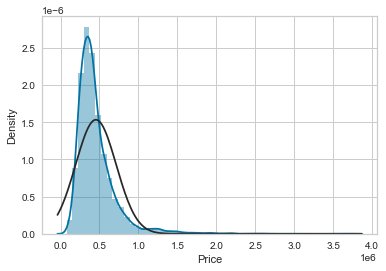

<Figure size 432x288 with 0 Axes>

In [361]:
#histogram and normal probability plot
sns.distplot(house_final_df['Price'], fit=norm);
fig = plt.figure()

In [362]:
## Printing skewness and kurtosis
print("Skewness: %f" % house_final_df['Price'].skew())
print("Kurtosis: %f" % house_final_df['Price'].kurt())

Skewness: 3.042713
Kurtosis: 16.371716


From the chart and values, we see latestPrice is highly right skewed. <br>
At the same time, very positive kurtosis indicates lots in the tails. The same can be noticed in the right skew.

##### Step 2: Splitting the data into train and test dataset

In [363]:
## Library for train_test split
from sklearn.model_selection import train_test_split

In [364]:
## Splitting the dataset into training and test
X = house_final_df.drop('Price', axis=1,)
y = pd.DataFrame(house_final_df['Price'])

In [365]:
## Create x_train, x_test, y_train, y_test using train_test_split function with a test size of 20% (training is 80%)
x_train, x_test, y_train, y_test = train_test_split(house_final_df, y, test_size=.2)

In [366]:
## reset indices to prevent any index mismatches
x_train.reset_index(inplace=True)
x_train.drop('index', axis=1, inplace=True)

x_test.reset_index(inplace=True)
x_test.drop('index',axis=1, inplace=True)

y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [367]:
## Printing the size of each dataframe
print("The shape of x_train df: {}".format(x_train.shape))
print("The shape of x_train df: {}".format(x_test.shape))
print("The shape of x_train df: {}".format(y_train.shape))
print("The shape of x_train df: {}".format(y_test.shape))

The shape of x_train df: (10733, 88)
The shape of x_train df: (2684, 88)
The shape of x_train df: (10733, 1)
The shape of x_train df: (2684, 1)


##### Step 3: Correlation Matrix

In [368]:
## Display all the columns and rows so they can all be seen
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## create a correlation matrix of the auto df and call is correlation_mat
correlation_matrix = x_train.corr()
correlation_matrix

,Price,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,parkingSpaces,yearBuilt,numPriceChanges,numOfPhotos,numOfAppliances,numOfParkingFeatures,patioporch,security,community,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,numOfBathrooms,numOfBedrooms,numOfStories,pr_sqft,zipcode_78617,zipcode_78652,zipcode_78653,zipcode_78660,zipcode_78701,zipcode_78702,zipcode_78703,zipcode_78704,zipcode_78705,zipcode_78717,zipcode_78719,zipcode_78721,zipcode_78722,zipcode_78723,zipcode_78724,zipcode_78725,zipcode_78726,zipcode_78727,zipcode_78728,zipcode_78729,zipcode_78730,zipcode_78731,zipcode_78732,zipcode_78733,zipcode_78734,zipcode_78735,zipcode_78736,zipcode_78737,zipcode_78738,zipcode_78739,zipcode_78741,zipcode_78742,zipcode_78744,zipcode_78745,zipcode_78746,zipcode_78747,zipcode_78748,zipcode_78749,zipcode_78750,zipcode_78751,zipcode_78752,zipcode_78753,zipcode_78754,zipcode_78756,zipcode_78757,zipcode_78758,zipcode_78759,city_austin,city_del valle,city_manchaca,city_manor,city_pflugerville,city_west lake hills,homeType_Condo,homeType_Single Family,homeType_Townhouse
Price,1.00,0.06,-0.17,-0.06,0.13,-0.11,0.02,0.10,0.03,0.11,-0.01,-0.00,0.18,0.05,0.12,0.09,0.07,-0.01,0.28,0.50,-0.11,0.09,0.07,-0.18,-0.09,0.34,0.05,0.44,0.29,0.22,0.63,-0.08,-0.01,-0.01,-0.03,0.01,0.04,0.32,0.34,0.04,-0.02,-0.01,-0.04,0.01,-0.02,-0.09,-0.09,0.01,-0.06,-0.08,-0.07,0.08,0.20,0.05,0.08,0.05,0.07,-0.02,0.02,0.01,0.06,-0.04,-0.02,-0.13,-0.11,0.20,-0.10,-0.16,-0.06,0.05,0.05,-0.03,-0.12,-0.13,0.08,0.05,-0.08,0.03,0.08,-0.08,-0.01,-0.01,-0.03,0.02,-0.04,0.04,-0.01
latitude,0.06,1.00,0.36,0.47,0.02,-0.06,0.04,0.02,0.03,0.02,-0.12,0.02,0.04,0.01,0.16,-0.03,-0.03,0.00,0.14,0.11,-0.07,0.12,-0.02,0.14,-0.03,0.27,0.06,0.04,0.08,0.03,-0.01,-0.10,-0.03,0.01,0.07,-0.00,-0.04,0.00,-0.11,0.00,0.41,-0.01,-0.02,-0.00,0.03,-0.00,-0.06,0.15,0.23,0.21,0.24,0.07,0.10,0.15,0.03,0.01,-0.04,-0.05,-0.18,-0.01,-0.22,-0.08,-0.01,-0.20,-0.25,-0.00,-0.24,-0.38,-0.20,0.19,0.02,0.05,0.16,0.12,0.03,0.12,0.15,0.23,0.05,-0.10,-0.03,0.00,0.07,-0.00,-0.01,-0.01,0.03
longitude,-0.17,0.36,1.00,-0.02,-0.08,-0.28,-0.06,-0.01,-0.04,-0.07,-0.23,-0.03,-0.09,-0.00,0.01,-0.07,-0.06,-0.06,-0.27,-0.45,0.12,-0.00,-0.19,0.47,-0.19,-0.54,-0.35,-0.32,-0.29,-0.16,0.12,0.13,-0.02,0.03,0.07,0.01,0.12,0.01,0.02,0.03,0.02,0.01,0.14,0.06,0.21,0.22,0.22,-0.09,0.13,0.14,0.01,-0.08,0.01,-0.30,-0.11,-0.02,-0.12,-0.15,-0.43,0.00,-0.31,0.09,0.02,0.08,-0.10,-0.04,0.02,-0.19,-0.26,-0.05,0.07,0.09,0.23,0.30,0.04,0.10,0.14,0.04,-0.15,0.13,-0.01,0.02,0.07,-0.01,0.06,-0.08,0.05
propertyTaxRate,-0.06,0.47,-0.02,1.00,0.04,0.14,0.03,0.01,0.02,0.04,0.13,-0.02,0.04,0.02,0.28,0.00,0.00,0.03,0.03,0.15,0.02,-0.05,-0.02,-0.05,-0.00,0.21,0.18,0.11,0.12,0.07,-0.17,-0.02,-0.00,-0.00,-0.01,-0.01,-0.05,-0.04,-0.06,-0.02,0.78,-0.00,-0.03,-0.02,-0.05,-0.03,-0.03,-0.03,-0.04,-0.03,0.54,-0.02,-0.05,-0.05,-0.02,-0.00,-0.03,-0.03,0.05,-0.00,-0.05,-0.03,-0.00,-0.05,-0.08,-0.02,-0.04,-0.08,-0.07,0.02,-0.03,-0.03,-0.05,-0.05,-0.03,-0.05,-0.04,-0.04,0.03,-0.02,-0.00,-0.00,-0.01,-0.00,-0.04,0.05,-0.02
garageSpaces,0.13,0.02,-0.08,0.04,1.00,0.05,0.05,0.92,0.05,0.95,0.09,0.11,0.29,0.18,0.70,0.25,0.19,0.08,0.07,0.16,-0.03,0.01,0.02,-0.04,0.05,0.07,0.03,0.15,0.12,0.08,0.02,-0.01,0.02,0.01,0.01,-0.01,-0.03,-0.00,0.02,-0.01,0.05,-0.01,-0.01,-0.02,-0.00,0.01,-0.01,0.03,0.00,0.01,-0.00,0.02,0.00,0.08,-0.00,0.01,0.00,0.02,0.07,-0.01,0.00,0.00,-0.00,-0.00,-0.03,0.01,-0.01,-0.02,-0.00,-0.01,-0.01,-0.00,-0.03,-0.01,0.01,-0.03,-0.02,-0.01,0.01,-0.01,0.01,-0.01,0.01,0.02,-0.03,0.03,-0.01
hasAssociation,-0.11,-0.06,-0.28,0.14,0.05,1.00,0.06,-0.00,0.02,0.04,0.63,-0.04,0.05,0.05,-0.01,0.02,0.07,0.07,-0.09,0.41,-0.12,0.11,0.10,0.02,0.33,0.29,0.43,0.37,0.23,0.32,-0.45,0.07,0.02,0.01,0.05,0.01,-0.14,-0.10,-0.14,-0.02,0.19,-0.01,-0.10,-0.07,-0.13,0.05,0.09,0.10,-0.01,-0.00,-0.03,0.08,-0.07,0.18,0.07,0.01,0.09,-0.02,0

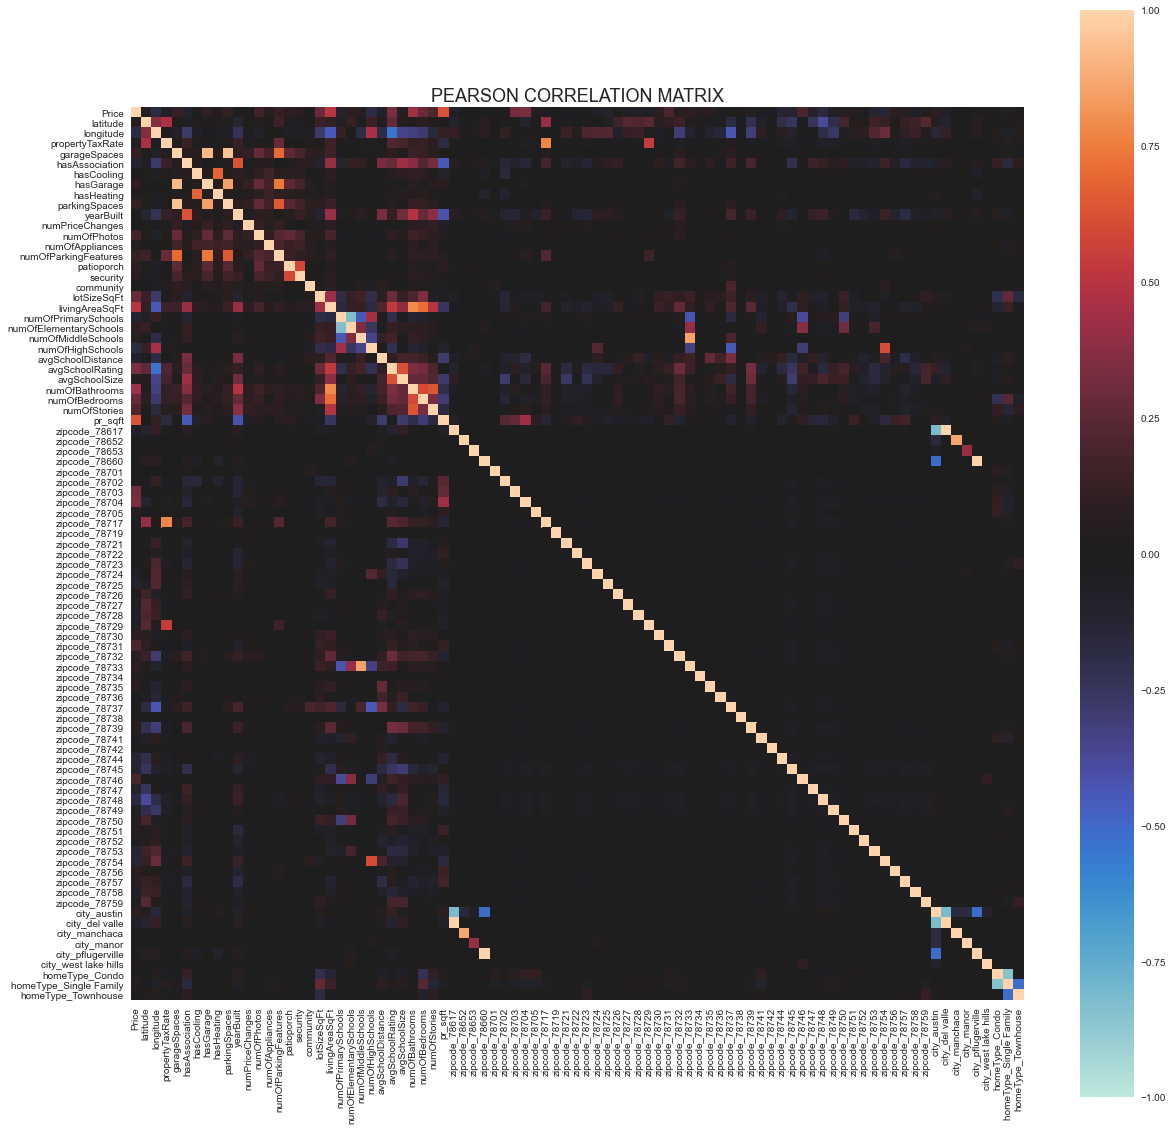

In [369]:
## look for multicollinearity of features
fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(x_train.corr(), center=0,  
           vmin=-1, vmax=1,  square=True)

# title
plt.title('PEARSON CORRELATION MATRIX', fontsize=18)

plt.show()

In [370]:
## Now, we will try to get our list of highly correlated feature pairs with following steps:
## save correlation matrix as a new data frame
## converts all values to absolute value
## reset the index to set the multindex to seperate columns
## sort values. 0 is the column automatically generated by the stacking
df_correlations = x_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df_correlations['pairs'] = list(zip(df_correlations.level_0, df_correlations.level_1))

# set index to pairs
df_correlations.set_index(['pairs'], inplace = True)

# rename our results column to correlation
df_correlations.rename(columns={0: "correlation"}, inplace=True)

# Drop 1:1 correlations to get rid of self pairs
df_correlations.drop(df_correlations[df_correlations['correlation'] == 1.000000].index, inplace=True)

# view pairs above 75% correlation and below 90% correlation (engineered features will correlate with each other above 95%)
df_correlations[(df_correlations.correlation>.75) & (df_correlations.correlation<.95)]

,level_0,level_1,correlation
pairs,,,
"(hasGarage, garageSpaces)",hasGarage,garageSpaces,0.92
"(garageSpaces, hasGarage)",garageSpaces,hasGarage,0.92
"(city_manchaca, zipcode_78652)",city_manchaca,zipcode_78652,0.87
"(zipcode_78652, city_manchaca)",zipcode_78652,city_manchaca,0.87
"(zipcode_78733, numOfMiddleSchools)",zipcode_78733,numOfMiddleSchools,0.86
"(numOfMiddleSchools, zipcode_78733)",numOfMiddleSchools,zipcode_78733,0.86
"(parkingSpaces, hasGarage)",parkingSpaces,hasGarage,0.85
"(hasGarage, parkingSpaces)",hasGarage,parkingSpaces,0.85
"(homeType_Condo, homeType_Single Family)",homeType_Condo,homeType_Single Family,0.84


In [371]:
# Check out our variables correlationg with price
df_correlations = x_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_correlations.loc[df_correlations['level_0'] == 'Price'].sort_values(0, ascending=False)

,level_0,level_1,0
0,Price,Price,1.00
30,Price,pr_sqft,0.63
19,Price,livingAreaSqFt,0.50
27,Price,numOfBathrooms,0.44
38,Price,zipcode_78704,0.34
25,Price,avgSchoolRating,0.34
37,Price,zipcode_78703,0.32
28,Price,numOfBedrooms,0.29
18,Price,lotSizeSqFt,0.28
29,Price,numOfStories,0.22


##### Observation

<b>Highly postively correlation</b>: The below features are having high positive correlation with Sale Price. This means for increase in the value for below feature would increase the price of house.

1. Latitude
2. Avgerage School Rating
3. Number of Bathrooms
4. Number of Bedrooms
5. Price per square foot
6. Number of parking features
7. Living Area Suqare ft
8. Lot Size Square Ft

In addition, I have also noticed that among numerous zip codes present in Austin city, the below zip codes are having postive correlation with Price of the house. So, the price of the house is high in these zip codes compared to other zip codes present in the Austin City.

1. 78703
2. 78704

Among various cities present in the dataset, I see Austin is having high correlation with Price compared to other cities. This tells that price of house is somewhat high in Austin city compared to other cities. 

##### Step 4: Graphical Analysis

In [372]:
## Prinint the column and datatypes in training dataset
x_train.dtypes

Price                     float64
latitude                  float64
longitude                 float64
propertyTaxRate           float64
garageSpaces                int64
hasAssociation              int32
hasCooling                  int32
hasGarage                   int32
hasHeating                  int32
parkingSpaces               int64
yearBuilt                   int64
numPriceChanges             int64
latest_saledate            object
numOfPhotos                 int64
numOfAppliances             int64
numOfParkingFeatures        int64
patioporch                  int64
security                    int64
community                   int64
lotSizeSqFt               float64
livingAreaSqFt            float64
numOfPrimarySchools         int64
numOfElementarySchools      int64
numOfMiddleSchools          int64
numOfHighSchools            int64
avgSchoolDistance         float64
avgSchoolRating           float64
avgSchoolSize               int64
numOfBathrooms            float64
numOfBedrooms 

###### Continous variables

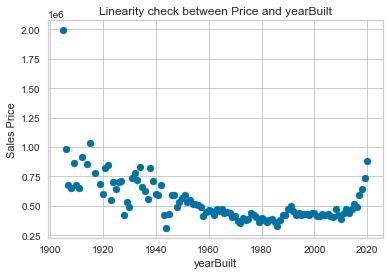

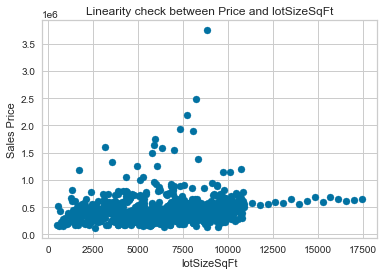

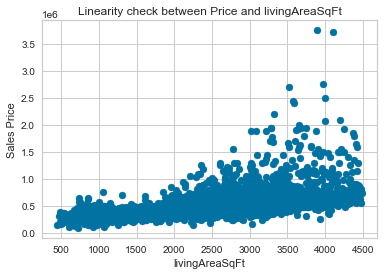

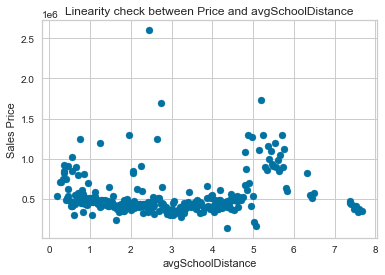

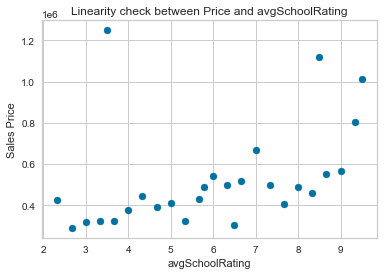

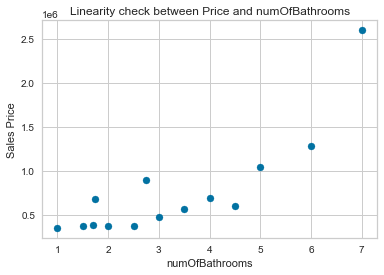

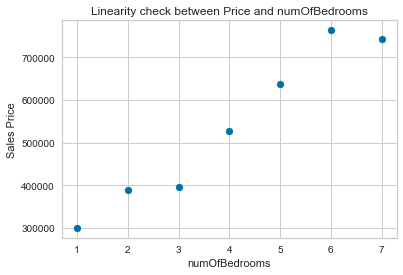

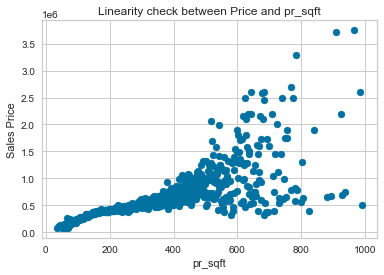

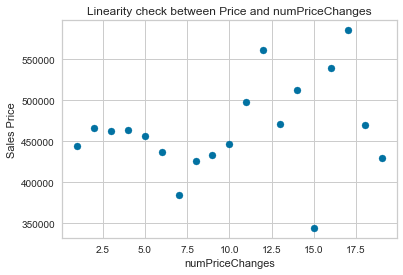

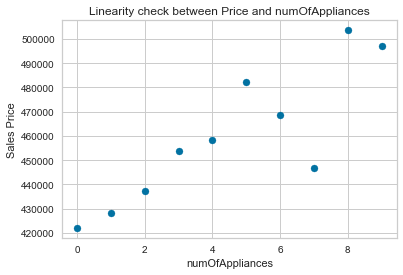

In [373]:
## Creating linear chart between price and couple of continous variables available in dataset
## Among various features available in the dataset, 
## I have chosen below continous variables for plotting which are most useful compared to other features
linearCols = ['yearBuilt','lotSizeSqFt','livingAreaSqFt','avgSchoolDistance','avgSchoolRating',
                                                      'numOfBathrooms','numOfBedrooms','pr_sqft','numPriceChanges','numOfAppliances']

## Plotting linear graph between Price and vriables present in the above list
for col in linearCols:
    lat_prices = x_train.groupby(col)['Price'].mean()
    plt.scatter(lat_prices.index, lat_prices)
    plt.title("Linearity check between Price and "+ col)
    plt.xlabel(col)
    plt.ylabel('Sales Price')
    plt.show()

##### Observation

1. <b>Price vs Year Built </b>: From the chart we could see chart looks like polynomial. For increase in year, there is a decrease in price of the house. The older houses sold for more price than the houses built in late 90s and beginning of 20s. This doesn't make sense. However, for the last few years, there is a increase in price for newer houses which makes sense.


2. <b>Price vs Lot Size Sq ft and Living Area Sq ft</b>: This chart looks somewhat linear. This makes complete senses as the price of house increases for increase in lot size and living area per square foot.


3. <b>Price vs Average School Distance</b>: The chart looks somewhat straight. The houses sold for more prices for the schools which are 5 to 6 miles away from the houses. However, the majority of the houses which are more than 6 miles away and less than 4 miles away from schools shows stright line, though few houses sold for more prices.


4. <b>Price vs average School rating</b>: This chart looks linear. This makes complete sense as the houses located in good school districts sold for more price compared to the houses which have poor school ratings.


5. <b>Price vs Number of Bedrooms and Bathrooms</b>: These charts are also look linear. The houses having more number of bedrooms and bathrooms sold for more price compared to the houses having less number of bedrooms and bathrooms.


6. <b>Price vs Price per Sq foot</b>: This chart looks linear. This is smehat confusing. Usually, the price per square foot will be less for bigger houses and more for smaller houses. However, this chart shows that price per square foot is high for the houses sold for more price compared to the houses sold for less price. 


7. <b>Price vs Number of Price Changes</b>: This chart looks somewhat linear. There are multiple scenarios available for this comparison. There may be multiple reduction in house prices due to number of offers provided to the house. At the same time, the house price would have gotten increased due to number of offers to the house. We could see the same from the chart.


8. <b>Price vs Number of Appliance</b>: This chart will be mostly linear. For increase in number of appliances, the house price will also increase. This makes sense as price of the house and number of appliances have positive correlation.

##### Categorical variables

In [374]:
## Creating a list of variables to be considered for categorical variables
categoricalCols = ['propertyTaxRate','hasAssociation','hasCooling','hasHeating','hasGarage','patioporch','security',
                   'numOfParkingFeatures','community','numOfPrimarySchools','numOfElementarySchools',
                   'numOfMiddleSchools','numOfHighSchools']

In [375]:
## Creating a df with categorical cols and price column
df_categoricals = x_train[categoricalCols]
df_categoricals['Price'] = x_train['Price']

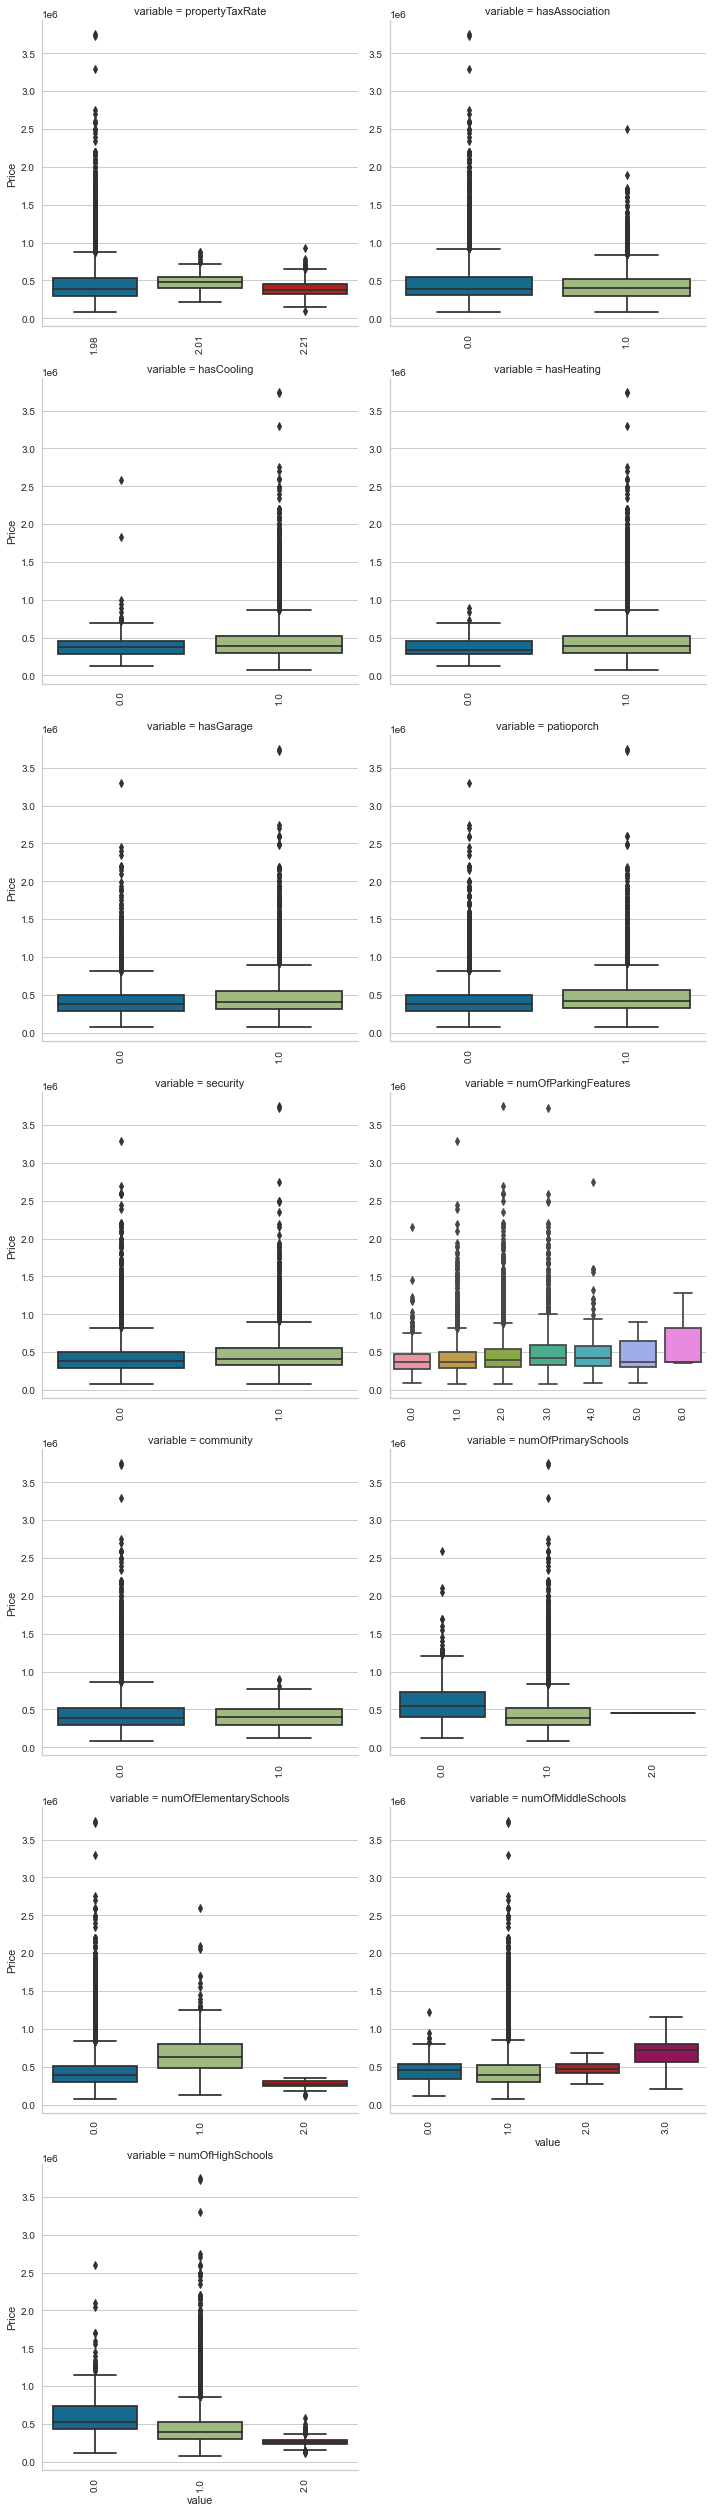

In [376]:
## Box plot
## Plot our categoricals as box plots vs price
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(df_categoricals, id_vars=['Price'], value_vars=categoricalCols)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "Price")

##### Observation:

From all the box charts plotted above, I could see the interquatile range values for all categorical variables lies around 500K  of house price. This is expected as 250K to 500K house price would be the range for median price of the house sold and most of the variables lies in this range. 

##### Step 5: Linear Regression

First we will consider only the continous variables from the house final dataframe as defined before and run linear regression model with "Price" as target and calculate the base score (R2).

In [377]:
## Importing all the libraries required for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split, GridSearchCV
import itertools
from math import sqrt

In [378]:
## Consider only continous variables from the dataframe for linear regression model
X = house_final_df[linearCols]
y = house_final_df['Price']

In [379]:
## Create x_train, x_test, y_train, y_test using train_test_split function with a test size of 20% (training is 80%)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [380]:
## Printing the shape of dataframe for x and y train and test
print("Shape of X_Train: {}".format(x_train.shape))
print("Shape of X_Test: {}".format(x_test.shape))
print("Shape of Y_Train: {}".format(y_train.shape))
print("Shape of Y_Test: {}".format(y_test.shape))

Shape of X_Train: (10733, 10)
Shape of X_Test: (2684, 10)
Shape of Y_Train: (10733,)
Shape of Y_Test: (2684,)


In [381]:
## Running linear regression model
## Create Regression Model
model = LinearRegression()

## Train the model
model.fit(x_train, y_train)

## Use model to make predictions on test set
y_pred = model.predict(x_test)

In [382]:
## Printout Testing set relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination (R2):", r2_score(y_test, y_pred))

Model Coefficients: [ 6.18775623e+02  2.71246966e+00  2.06967699e+02 -5.18400462e+03
 -6.25451324e+03  2.80330073e+04  9.45218548e+03  2.00721810e+03
 -2.93827350e+02  2.03758862e+03]
Mean Absolute Error (MAE): 57561.88702292193
Root Mean Squared Error (RMSE): 94544.3077478537
Coefficient of Determination (R2): 0.8686808902419605


In [383]:
X.describe()

,yearBuilt,lotSizeSqFt,livingAreaSqFt,avgSchoolDistance,avgSchoolRating,numOfBathrooms,numOfBedrooms,pr_sqft,numPriceChanges,numOfAppliances
count,13417.00,13417.00,13417.00,13417.00,13417.00,13417.00,13417.00,13417.00,13417.00,13417.00
mean,1988.30,8318.87,2040.85,1.75,5.66,2.58,3.38,233.09,2.99,3.49
std,21.82,2963.94,777.24,0.95,1.84,0.83,0.74,108.35,2.45,1.85
min,1905.00,522.00,306.00,0.20,2.33,1.00,1.00,36.00,1.00,0.00
25%,1974.00,6316.00,1445.00,1.07,4.00,2.00,3.00,161.00,1.00,2.00
50%,1993.00,7840.00,1895.00,1.50,5.67,2.50,3.00,202.00,2.00,3.00
75%,2006.00,9931.00,2516.00,2.17,7.00,3.00,4.00,276.00,4.00,4.00
max,2020.00,17424.00,4485.00,7.67,9.50,7.00,7.00,990.00,23.00,10.00


In [384]:
pd.options.display.float_format = '{:.2f}'.format
y.describe()

count     13417.00
mean     454033.44
std      260071.84
min       77500.00
25%      299900.00
50%      395000.00
75%      525000.00
max     3750000.00
Name: Price, dtype: float64

##### Observation:

1. The low MAE value of 55452.67 indicates that the forecast value is nearer to the true values
2. The low RMSE of 8710.42 means that the predictions are not that far away from the values (mpg range from 77500-3750000), and the predictions are relatively accurate
3. The R2 value of 0.87 (87%) is somewhat high (0-1 scale) and means that the predictor mostly determines the observed value. These metrics are almost identical to testing set metrics in linear regression

##### Interaction
A function has been writted which finds all of the feature combinations possible in our dataset. Then for each combination, the function runs a linear regression and gets the r^2 score for the regression including that feature combination. All scores are recorded and r^2 score improvement is assessed, with the resulting table giving the increase in model improvement from a feature combo.

In [385]:
def test_feature_combinations(price, variables):
    
    """Function takes in target price and a dataframe of independent variables, and 
    tests model improvement for each combination of variables
    ARGUMENTS:
    Y of target values
    X-dataframe of continuous features
    Returns dataframe of score improvements over base score for each interaction combination"""
    
    # select our estimator and our cross validation plan
    regression = LinearRegression()
    
    # prepare our scoring dataframe
    scoring_df = pd.DataFrame()
    
    # prepare our lists to store our features and scores as we iterate
    scores = []
    feature1 = []
    feature2 = []
    
    # Get a list of all of our features, and remove our target variable 'price' from the list
    features = list(variables.columns)

    # make a list of all of our possible feature combinations
    feature_combos = itertools.combinations(features, 2)
    feature_combos = list(feature_combos)
    
    # set our y-value as our target variable
    y = price
    
    # prepare our x-value with our independent variables. We do an initial split here in order to run a 
    # linear regression to get a base r^2 on our basic model without interactions
    X = variables
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    base_score = round(np.mean(cross_val_score(regression, X_train, y_train, scoring='r2')), 4)   
    print("Model base score:  ", base_score)
    
    # now we run the regression on each feature combo
    for feature in feature_combos:
        feat1, feat2 = feature[0], feature[1]
        
        # create the test interaction on our data set
        variables['test_interaction'] = variables[feat1] * variables[feat2]
        
        # create a new X which includes the test interaction and drops our target value
        X = variables
        
        # make a new split so that our x-splits include the test interaction
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        
        # Run a linear regression with cross-val just like our base model, and append the score to our scores list
        new_score = round(np.mean(cross_val_score(regression, X_train, y_train, scoring='r2')), 4)
        scores.append(new_score)
        
        # put feature 1 on a list
        feature1.append(feat1)
        
        # put feature 2 on a list
        feature2.append(feat2)
        print(feat1, feat2, new_score)
        
    # load all of our lists into the scoring dataframe
    scoring_df['feature1'] = feature1
    scoring_df['feature2'] = feature2
    scoring_df['scores'] = scores
    scoring_df['improvement'] = scoring_df['scores'] - base_score
    variables.drop('test_interaction', axis=1, inplace=True)
    
    # return our scoring dataframe to the function
    return scoring_df

In [386]:
scoring_df = test_feature_combinations(y, X)

Model base score:   0.8774
yearBuilt lotSizeSqFt 0.8776
yearBuilt livingAreaSqFt 0.895
yearBuilt avgSchoolDistance 0.8773
yearBuilt avgSchoolRating 0.8775
yearBuilt numOfBathrooms 0.8839
yearBuilt numOfBedrooms 0.8828
yearBuilt pr_sqft 0.9037
yearBuilt numPriceChanges 0.8764
yearBuilt numOfAppliances 0.875
lotSizeSqFt livingAreaSqFt 0.8765
lotSizeSqFt avgSchoolDistance 0.8782
lotSizeSqFt avgSchoolRating 0.8747
lotSizeSqFt numOfBathrooms 0.874
lotSizeSqFt numOfBedrooms 0.8756
lotSizeSqFt pr_sqft 0.8953
lotSizeSqFt numPriceChanges 0.8762
lotSizeSqFt numOfAppliances 0.8727
livingAreaSqFt avgSchoolDistance 0.8902
livingAreaSqFt avgSchoolRating 0.8781
livingAreaSqFt numOfBathrooms 0.8759
livingAreaSqFt numOfBedrooms 0.8909
livingAreaSqFt pr_sqft 1.0
livingAreaSqFt numPriceChanges 0.8742
livingAreaSqFt numOfAppliances 0.8733
avgSchoolDistance avgSchoolRating 0.8752
avgSchoolDistance numOfBathrooms 0.8825
avgSchoolDistance numOfBedrooms 0.8838
avgSchoolDistance pr_sqft 0.8772
avgSchoolDistanc

In [387]:
## Showing scoring dataframe with scores and improvement
scoring_df

,feature1,feature2,scores,improvement
0,yearBuilt,lotSizeSqFt,0.88,0.00
1,yearBuilt,livingAreaSqFt,0.90,0.02
2,yearBuilt,avgSchoolDistance,0.88,-0.00
3,yearBuilt,avgSchoolRating,0.88,0.00
4,yearBuilt,numOfBathrooms,0.88,0.01
5,yearBuilt,numOfBedrooms,0.88,0.01
6,yearBuilt,pr_sqft,0.90,0.03
7,yearBuilt,numPriceChanges,0.88,-0.00
8,yearBuilt,numOfAppliances,0.88,-0.00
9,lotSizeSqFt,livingAreaSqFt,0.88,-0.00


##### Observation

On running linear regression model on interaction (combination of every 2 features available in the dataset), there is an improvement in the overall score of the model. Though, score has been improved for most of the combination, the score has been reduced for some of the features like number of bedrooms and number of price changes and number of bathrooms and number of appliances.

##### Linear Regression for continous and categorical variables

In [388]:
## Copying the dataframe with and without price field
house_final_df = house_dummy_df.copy()
house_noprice_df = house_dummy_df.copy()

In [389]:
## Dropping latestPrice and salesdate from the dataframe
house_noprice_df.drop('latestPrice', axis=1, inplace=True)
house_noprice_df.drop('latest_saledate', axis=1, inplace=True)

In [390]:
## Splitting the dataframe into test and training set
## Create x_train, x_test, y_train, y_test using train_test_split function with a test size of 20% (training is 80%)
x_train, x_test, y_train, y_test = train_test_split(house_noprice_df, house_final_df[['latestPrice']], test_size=.2)

In [391]:
## Printing the shape of dataframe for x and y train and test
print("Shape of X_Train: {}".format(x_train.shape))
print("Shape of X_Test: {}".format(x_test.shape))
print("Shape of Y_Train: {}".format(y_train.shape))
print("Shape of Y_Test: {}".format(y_test.shape))

Shape of X_Train: (10733, 86)
Shape of X_Test: (2684, 86)
Shape of Y_Train: (10733, 1)
Shape of Y_Test: (2684, 1)


In [392]:
## Train the model
model.fit(x_train, y_train)

## Use model to make predictions on test set
y_pred = model.predict(x_test)

In [393]:
## Printout Testing set relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination (R2):", r2_score(y_test, y_pred))

Model Coefficients: [[ 2.24478930e+05  1.34854374e+05 -1.24158782e+05  2.07346977e+04
  -3.91190014e+04  6.08068959e+04 -3.06300925e+04 -3.94189522e+04
  -9.69674414e+03  1.35465331e+03 -1.22308809e+03  9.77441503e+01
   9.66249243e+02  4.99318768e+03  2.74928881e+03 -2.72882101e+02
  -1.41052296e+04  7.23647366e-01  2.16790478e+02 -5.40137512e+03
  -2.56358155e+04 -5.78454423e+03 -2.65553423e+03  5.04019580e+01
   2.05142604e+03 -8.46408050e+00  2.81828075e+04  5.60163064e+03
  -2.51680658e+04  1.83428494e+03  2.45836725e+04  1.97123860e+04
  -1.00596193e+05 -2.10531735e+04  5.28985487e+04 -7.26413086e+04
   1.44280660e+05  4.19850490e+04  1.17707926e+04 -9.05793866e+04
   1.11322151e-09 -4.27233660e+04 -4.65094433e+04 -1.21820469e+04
  -9.93684556e+03  1.35767396e+04 -1.00324243e+05 -4.13997491e+04
  -4.86387859e+04 -3.71132509e+04 -3.28838020e+04  4.17446648e+04
  -7.93642774e+04  3.34782906e+04  3.04616973e+05  1.70126412e+04
   1.46095269e+03 -5.86687854e+04  2.51191636e+04 -2.249

##### Observation:

1. On including categorical variables/feaures to the dataset, the score (R2) has been improved little bit to 90.5%.
2. At the same time, mean absolute error (MAE: 48663.8169) and root mean squared error (RMSE: 78207.0110) have been reduced compared to previous dataset where continous variables alone included.